# Data Prepration and Processing

In [26]:
%pip install "numpy<2"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import re
import unicodedata
import nltk
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from collections import Counter
import csv
random.seed(42)

# Open the Lao dataset files
try:
    with open('dataset/bot_data_lao.txt', 'r', encoding='utf-8') as f:
        bot_data_lao = f.read()
        print("Lao bot data loaded successfully.")
except FileNotFoundError:
    print("File 'dataset/bot_data_lao.txt' not found.")

try:
    with open('dataset/human_data_lao.txt', 'r', encoding='utf-8') as f:
        human_data_lao = f.read()
        print("Lao human data loaded successfully.")
except FileNotFoundError:
    print("File 'dataset/human_data_lao.txt' not found.")

# Open the Luxembourgish dataset files (ensure the correct file extension is used)
try:
    with open('dataset/bot_data_luxembourgish.txt', 'r', encoding='utf-8') as f:
        bot_data_luxembourgish = f.read()
        print("Luxembourgish bot data loaded successfully.")
except FileNotFoundError:
    print("File 'dataset/bot_data_luxembourgish.txt' not found.")

try:
    with open('dataset/human_data_luxembourgish.txt', 'r', encoding='utf-8') as f:
        human_data_luxembourgish = f.read()
        print("Luxembourgish human data loaded successfully.")
except FileNotFoundError:
    print("File 'dataset/human_data_luxembourgish.txt' not found.")


Lao bot data loaded successfully.
Lao human data loaded successfully.
Luxembourgish bot data loaded successfully.
Luxembourgish human data loaded successfully.


In [30]:
def summarize_text(text):
    """
    Summarizes the given text by printing the number of words and characters, and the first 20 words.
    """
    # Count the number of words and characters
    num_words = len(text.split())
    num_chars = len(text)

    # Print the summary information
    print(f"Number of words: {num_words}")
    print(f"Number of characters: {num_chars}")

    # Print the first 20 words
    print(f"First 20 words: {text.split()[:20]}")

# Summarize the bot-generated Lao text
summarize_text(bot_data_lao)

# Summarize the human-written Lao text
summarize_text(human_data_lao)

# Summarize the bot-generated Luxembourgish text
summarize_text(bot_data_luxembourgish)

# Summarize the human-written Luxembourgish text
summarize_text(human_data_luxembourgish)


Number of words: 27320
Number of characters: 153262
First 20 words: ['ພາກທີ', 'ການເລີ', 'ມຕົ', 'ນຂອງການເດີນທາງ', 'ນຕອນເຊົ', 'າທີ', 'ມີຕົ', 'ນ', 'ອກປົກຄຸມທົ', 'ວບ', 'ານນ', 'ອຍ', 'ນພາກເ', 'ືອຂອງປະເທດລາວ', 'ມີຊາຍ', 'ຸ', 'ມຄົນນຶ', 'ງຊື', 'ວ', 'າ']
Number of words: 170369
Number of characters: 1251417
First 20 words: ['ສິນ', 'ຊ', 'ເທລັມ', 'ຂຽນເປັນຄໍາເວົ', 'າທໍາມະດາ', 'ອປະກໍາ', 'ດຍ', 'ຊມສົາຕັ', 'ມ', 'ຫ', 'ເດັກນັ', 'ສະມາຄົມສົງປິມ', 'ຫເດັກນອຍລາວ', 'ແຫງຍີປຸນ', 'ອົງການ', 'ອຍນິເຊັບ', 'ບາຣ', 'ສິນ', 'ຊ', 'ເຫລັ']
Number of words: 27443
Number of characters: 191893
First 20 words: ['Einleitung', 'DWelt', 'vun', 'der', 'Technologie', 'entwckelt', 'sech', 'sier', 'an', 'all', 'Dag', 'gesin', 'mer', 'nei', 'Innovatiounen', 'di', 'eis', 'Iddi', 'vum', 'Liewen']
Number of words: 420030
Number of characters: 2576658
First 20 words: ['Baháí', 'Emissiounen', 'um', 'Radio', 'ARA', 'Lafréquence', 'detouteslescouleurs', 'Inhalt', 'Aféierung', 'Positiv', 'Stressbewältegung', 'an', 'der', 'Partnerschaft', 'an', '

In [32]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Taqi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
import re
from collections import Counter

def preprocess_text(text):
    # Lowercase and remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text.lower())
    # Tokenize by splitting on whitespace
    tokens = text.split()
    return tokens

def count_frequencies(tokens):
    # Count the frequency of each word
    return Counter(tokens)

def main(corpus_text):
    # Step 1: Preprocess the text
    tokens = preprocess_text(corpus_text)

    # Step 2: Count word frequencies
    word_counts = count_frequencies(tokens)

    # Step 3: Analyze frequencies - display the most common words
    most_common_words = word_counts.most_common(50)

    return most_common_words

corpus_text = human_data_luxembourgish
print(main(corpus_text))


[('an', 13632), ('vun', 8278), ('de', 7986), ('der', 7720), ('a', 7036), ('ass', 6372), ('di', 6324), ('et', 4562), ('ze', 4158), ('bah', 4094), ('fir', 4094), ('eng', 4016), ('dass', 3302), ('e', 3130), ('vu', 3098), ('si', 2966), ('vum', 2954), ('den', 2932), ('sech', 2874), ('wi', 2778), ('am', 2770), ('dat', 2760), ('huet', 2558), ('mat', 2552), ('op', 2458), ('sinn', 2218), ('net', 2172), ('all', 1982), ('mir', 1962), ('eis', 1880), ('wat', 1850), ('ginn', 1826), ('zu', 1702), ('mi', 1664), ('och', 1652), ('en', 1560), ('ech', 1514), ('hunn', 1468), ('gtt', 1464), ('een', 1452), ('bahullh', 1440), ('um', 1400), ('welt', 1360), ('aus', 1358), ('iwwer', 1342), ('sou', 1304), ('un', 1300), ('engem', 1258), ('enger', 1250), ('wann', 1230)]


In [36]:
import regex                    # or just use isalpha() if you want no extra dependencies
from collections import Counter

def preprocess_text(text):
    text = text.lower()
    text = regex.sub(r'[^\p{L}\s]+', '', text)   # or use the isalpha() approach
    return text.split()

def count_frequencies(tokens):
    return Counter(tokens)

def main(corpus_text):
    return count_frequencies(preprocess_text(corpus_text)).most_common(50)

if __name__ == "__main__":
    with open('dataset/human_data_lao.txt', encoding='utf-8') as f:
        human_lao = f.read()
    print(main(human_data_lao))

[('າ', 4659), ('ເ', 4448), ('ວ', 3958), ('ດ', 3529), ('ນ', 3398), ('ຫ', 2241), ('ງ', 1956), ('ແ', 1830), ('ບ', 1771), ('ຈ', 1761), ('ຜ', 1660), ('ຂ', 1319), ('ສ', 1318), ('ກ', 1249), ('ຕ', 1248), ('ປ', 1210), ('ລ', 1151), ('ມ', 1112), ('ຫນ', 1096), ('ທ', 1095), ('ພຣະ', 876), ('ເມ', 824), ('ດຍ', 823), ('ຢ', 804), ('າງ', 774), ('ສນຍນນ', 663), ('ຄ', 654), ('ະ', 622), ('ພຣະວນຍປດກ', 613), ('າງນ', 596), ('ຊ', 581), ('ເຣອງ', 548), ('ອ', 530), ('ະລະ', 514), ('ແນ', 481), ('ເຣ', 456), ('ແລະ', 450), ('ພກສທງຫລາຍ', 440), ('ແປແລະຮງບຮງງ', 435), ('ກກບ', 434), ('ຖ', 428), ('ສນສກ', 415), ('ເນ', 413), ('ຟກສທງຫລາຍ', 402), ('ພ', 387), ('ຕຣປດກກາບາລາວ', 386), ('ອງ', 380), ('ແລ', 377), ('ເພ', 369), ('ຄວນ', 344)]


In [38]:
corpus_text = human_data_luxembourgish
print(main(corpus_text))

[('an', 13632), ('vun', 8276), ('de', 7986), ('der', 7716), ('a', 7034), ('ass', 6372), ('déi', 6226), ('et', 4562), ('ze', 4158), ('fir', 4094), ('eng', 4016), ('dass', 3302), ('e', 3130), ('vu', 3096), ('baháí', 3092), ('vum', 2954), ('den', 2932), ('sech', 2874), ('wéi', 2778), ('am', 2770), ('dat', 2760), ('huet', 2558), ('mat', 2552), ('op', 2458), ('si', 2452), ('sinn', 2218), ('net', 2172), ('all', 1980), ('mir', 1962), ('eis', 1880), ('wat', 1850), ('ginn', 1826), ('zu', 1702), ('och', 1652), ('en', 1560), ('ech', 1514), ('méi', 1508), ('hunn', 1468), ('gëtt', 1464), ('een', 1452), ('um', 1400), ('baháulláh', 1400), ('welt', 1360), ('aus', 1358), ('iwwer', 1342), ('sou', 1304), ('un', 1300), ('engem', 1258), ('enger', 1250), ('wann', 1230)]


In [40]:
import re
from collections import Counter
def find_frequent_words(text, threshold=150):
    words = text.split()
    word_counts = Counter(words)
    frequent_words = [word for word, count in word_counts.items() if count >= threshold]
    return frequent_words

frequent_words_lao_bot = find_frequent_words(human_data_lao)
print(frequent_words_lao_bot )

['ຊ', 'ດຍ', 'ມ', 'ຫ', 'ນ', 'ແລະ', 'ຕ', 'ທ', 'ຈ', 'ະ', 'ເ', 'ງ', 'ວ', 'າ', 'ຮ', 'ອ', 'ລ', 'ຂ', 'ສ', 'ກໍ', 'ດ', 'ພ', 'ຂໍ', 'ແ', 'ຜ', 'ວນ', 'ຜູ', 'າງ', 'ານ', 'ບ', 'ປ', 'ເນື', 'ບໍ', 'ວຍ', 'ນາ', 'ເພື', 'ຍ', 'ວາ', 'ຢູ', 'ກ', 'ແລ', 'ອງ', 'ຢ', 'ເງ', 'ອຍ', 'ນີ', 'ຫນ', 'ວັ', 'ອນ', 'ຖ', 'ຄ', 'ເມ', 'ແມ', 'ນື', 'ແຕ', 'ຮບ', 'ເສ', 'ຄວນ', 'ລູ', 'ພວກທ', 'ເນ', 'ລະ', 'ຈວ', 'ຈວາ', 'ອງທີ', 'ແນ', 'ທານ', 'ງຫລາຍ', 'ພຣະ', 'ວົງວານິດ', 'ແປແລະຮງບຮງງ', 'ຕຣປີຕົກກາບາລາວ', 'ສົນສັກ', 'ພຣະວິນັຍປີດົກ', 'ຕຣປີດຶກກາບາລາວ', 'ສນຍນນ', 'ອີກຢ', 'າງນຶ', 'ພຣະຜູ', 'າງນີ', 'ຫຊ', 'ເຣື', 'ຄໍາວາ', 'ຟກສູທົງຫລາຍ', 'ະລະ', 'ເຣືອງ', 'ສົມສັກ', 'ານບໍ', 'ເຣອງທ', 'ແປແລະຮຽບຮງງ', 'ຂົງວານັດ', 'ສນັຍນັນ', 'ນໍາເຣືອງນີ', 'ຊາບ', 'ເຣອງ', 'ຊົງຊາບ', 'ປຂາບທລພຣະຜູ', 'ພຣະວນຍປີຕົກ', 'ອງອາບັຕິ', 'ຕຣປີດືກກາບາລາວ', 'ຂົງວງນຸດ', 'ກກບ']


### Stop Words Removal and Tokenization

In [15]:
import os
import re

# ─── Helper functions ─────────────────────────────────────────────────────────

def remove_stop_words(tokens, stopwords):
    return [token for token in tokens if token not in stopwords]

def clean_text(text):
    # Keep only ASCII letters, Lao block (U+0E80–U+0EFF), and spaces
    return re.sub(r'[^a-zA-Z\u0E80-\u0EFF\s]', '', text).strip()

def process_text(text, stopwords):
    tokens = text.split()
    print(f"Tokens before stopword removal (first 10): {tokens[:10]}")
    print(f"Word count before stopword removal: {len(tokens)}")
    
    tokens_no_stop = remove_stop_words(tokens, stopwords)
    print(f"Tokens after removing stopwords (first 10): {tokens_no_stop[:10]}")
    print(f"Word count after removing stopwords: {len(tokens_no_stop)}")
    
    return clean_text(' '.join(tokens_no_stop))


# ─── Full stop-word lists ──────────────────────────────────────────────────────

stopwords_lao = {
    'ໄວ້','ໄປ','ໄດ້','ໃຫ້','ໃນ','ໂດຍ','ແຫ່ງ','ແລ້ວ','ແລະ','ແບບ',
    'ແຕ່','ເອງ','ເລີຍ','ເລີ່ມ','ເຫັນ','ເບິ່ງ','ເຮົາ','ເພື່ອ','ເພາະ',
    'ເປັນ','ເປີດ','ເນື່ອງຈາກ','ເຊັ່ນ','ເຄີຍ','ເຂົ້າ','ເຂົາ','ອີກ','ອາດ',
    'ອອກ','ຢ່າງ','ສິ່ງ','ຢູ່','ຕ້ອງການ','ຢາກ','ຫາກ','ຫລາຍ','ຫລັງຈາກ',
    'ຫລັງ','ຫລື','ຫນຶ່ງ','ສ່ວນ','ສົ່ງ','ສຸດ','ສໍາລັບ','ວ່າ','ມື້','ລົງ',
    'ຮ່ວມ','ລາຍ','ຮັບ','ລະຫວ່າງ','ລວມ','ຍັງ','ມີ','ມາ','ພ້ອມ','ພົບ','ຜ່ານ',
    'ຜົນ','ຫນ້າ','ນີ້','ນໍາ','ນັ້ນ','ນັກ','ນອກຈາກ','ທຸກ','ທີ່ສຸດ','ທີ່','ເຮັດໃຫ້',
    'ເຮັດ','ທາງ','ບາງ','ທັງ','ຖ້າ','ຖືກ','ຕ້ອງ','ຕ່າງໆ','ຕ່າງ','ຕໍ່','ຕາມ',
    'ຕັ້ງແຕ່','ຕັ້ງ','ດ້ານ','ດັງ','ເຊິ່ງ','ຊ່ວງ','ຈຶ່ງ','ຈາກ','ຈັດ','ຈະ',
    'ຄື','ຄວາມ','ຄັ້ງ','ຄົງ','ຂຶ້ນ','ຂອງ','ຂໍ','ຂະນະ','ກ່ອນ','ກໍ','ການ','ກັບ',
    'ກັນ','ກວ່າ','ກ່າວ','ບັນດາ','ແມ່ນຫຍັງ','ສະເພາະ','ດຽວກັນ','ດຽວ','ບໍ່','ທໍາອິດ'
}

stopwords_luxembourgish = {
    't','a','all','alleguer','allem','alles','als','also','am','an','anerefalls','ass',
    'aus','awer','bei','beim','bis',"d'",'da','dach','dann','dat','datt','de','dee',
    'deel','deem','deen','deene','dem','den','deng','denger','der','di','dir','do',
    'domat','dozou','drop','du','duerch','duerno','däin','där','déi','dësem','e','ech',
    'ee','een','eent','eis','eise','eisen','eiser','em','en','eng','engem','enger',
    'entweder','eréischt','esou','et','falls','fir','geet','gi','ginn','gouf','goung',
    'géif','géint','gëtt','hat','haten','hatt','hei','hien','hier','hin','hir','hiren',
    'hu','huet','hun','hunn','hätt','iech','iwwer','jiddereen','jidderen','jiddereng',
    'jiddwereen','jiddwerengem','jo','kann','kee','keen','kuckt','kéng','kéngem','kéngen',
    'kënne','kënnt','ma','mam','mat','mech','meng','menger','mer','mir','muss','mä',
    'mécht','méi','nach','nawell','nee','nees','net','no','nom','nu','näischt','nämlech',
    'nëmme','nëmmen','och','oder','ons','onsen','onser','onst','op','ouni','schonn',
    'schonns','se','sech','selwecht','selwer','seng','senge','sengem','senger','si',
    'sidd','sie','sinn','sollten','soss','sot','sou','souguer','säi','säin','tëscht',
    'u','um','un','virdrun','vu','vum','vun','wann','war','waren','wat','wei','weider',
    'wollt','wou','wouhin','wéini','wéinst','wëllt','zanter','ze','zu','zum','zwar',
    'à','äert','äis','är','ären','ë','ëm','ënner'
}


# ─── Load your actual text data ────────────────────────────────────────────────

paths = {
    "bot_data_lao":           "dataset/bot_data_lao.txt",
    "human_data_lao":         "dataset/human_data_lao.txt",
    "bot_data_luxembourgish": "dataset/bot_data_luxembourgish.txt",
    "human_data_luxembourgish": "dataset/human_data_luxembourgish.txt",
}

texts = {}
for name, p in paths.items():
    if os.path.exists(p):
        with open(p, encoding="utf-8") as f:
            texts[name] = f.read()
    else:
        raise FileNotFoundError(f"Could not find '{p}'. Please update the path.")

# ─── Process & print ──────────────────────────────────────────────────────────

processed_lao_bot             = process_text(texts["bot_data_lao"],           stopwords_lao)
processed_lao_human           = process_text(texts["human_data_lao"],         stopwords_lao)
processed_luxembourgish_bot   = process_text(texts["bot_data_luxembourgish"], stopwords_luxembourgish)
processed_luxembourgish_human = process_text(texts["human_data_luxembourgish"], stopwords_luxembourgish)

print("\nProcessed Lao Bot Text:            ", processed_lao_bot[:1000])
print("Processed Lao Human Text:          ", processed_lao_human[:1000])
print("Processed Luxembourgish Bot Text:  ", processed_luxembourgish_bot[:1000])
print("Processed Luxembourgish Human Text:", processed_luxembourgish_human[:1000])


Tokens before stopword removal (first 10): ['ພາກທີ', 'ການເລີ', 'ມຕົ', 'ນຂອງການເດີນທາງ', 'ນຕອນເຊົ', 'າທີ', 'ມີຕົ', 'ນ', 'ອກປົກຄຸມທົ', 'ວບ']
Word count before stopword removal: 27320
Tokens after removing stopwords (first 10): ['ພາກທີ', 'ການເລີ', 'ມຕົ', 'ນຂອງການເດີນທາງ', 'ນຕອນເຊົ', 'າທີ', 'ມີຕົ', 'ນ', 'ອກປົກຄຸມທົ', 'ວບ']
Word count after removing stopwords: 25954
Tokens before stopword removal (first 10): ['ສິນ', 'ຊ', 'ເທລັມ', 'ຂຽນເປັນຄໍາເວົ', 'າທໍາມະດາ', 'ອປະກໍາ', 'ດຍ', 'ຊມສົາຕັ', 'ມ', 'ຫ']
Word count before stopword removal: 170369
Tokens after removing stopwords (first 10): ['ສິນ', 'ຊ', 'ເທລັມ', 'ຂຽນເປັນຄໍາເວົ', 'າທໍາມະດາ', 'ອປະກໍາ', 'ດຍ', 'ຊມສົາຕັ', 'ມ', 'ຫ']
Word count after removing stopwords: 168348
Tokens before stopword removal (first 10): ['Einleitung', 'DWelt', 'vun', 'der', 'Technologie', 'entwckelt', 'sech', 'sier', 'an', 'all']
Word count before stopword removal: 27443
Tokens after removing stopwords (first 10): ['Einleitung', 'DWelt', 'Technologie', 'entwckelt', 'sier', 'D

## Stemming


In [43]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
lao_lux_stemmer_fast.py

Ultra-fast Lao & Luxembourgish stemmer for <10MB corpora.
- Single-pass regex token extraction
- Single combined regex for affix/tone stripping
- Pure Python list comprehensions
- Rapid file read/write
- Throughput measurement
- Prints sample stems for each file or demo if missing
"""
import re
import json
import time
import argparse
from pathlib import Path
from typing import Dict, Optional, List

# Precompile patterns
LAO_TOKEN_RE = re.compile(r'[\u0E80-\u0EFF]{3,}')  # Minimum 3 chars
LAO_STRIP_RE = re.compile(r'^(?:ຈະ|ໄດ້|ກຳລັງ|ບໍ່)|ໆ|[\u0EC8-\u0ECF]')
LUX_SUFFIX_RE = re.compile(r'(?:chen|er|en|es|e)$', re.IGNORECASE)

def load_rules(path: Optional[Path]) -> Dict[str, str]:
    """Load JSON rules or return empty dict if file doesn't exist"""
    if path and path.exists():
        data = json.loads(path.read_text(encoding='utf-8'))
        if isinstance(data, dict):
            return {str(k): str(v) for k, v in data.items()}
    return {}

def stem_lao(text: str, rules: Dict[str, str]) -> List[str]:
    """Stem Lao text by extracting tokens and stripping affixes"""
    tokens = LAO_TOKEN_RE.findall(text)
    return [rules.get(tok) or LAO_STRIP_RE.sub('', tok) for tok in tokens]

def stem_lux(text: str, rules: Dict[str, str]) -> List[str]:
    """Stem Luxembourgish text by splitting and stripping suffixes"""
    return [
        rules.get(tok.lower()) or LUX_SUFFIX_RE.sub('', tok.lower())
        for tok in text.split()
        if tok.isalpha() and len(tok) > 2
    ]

# Demo texts for fallback
LAO_DEMO = "ຂ້ອຍໄປບ້ານນ້ອຍ"
LUX_DEMO = "Ech si schonn do"

def main():
    parser = argparse.ArgumentParser(description='Ultra-fast Lao & Lux stemmer')
    parser.add_argument('-i', '--input-dir', type=Path, default=Path('dataset'),
                       help='Directory containing input text files')
    parser.add_argument('-o', '--output-dir', type=Path, default=Path('dataset'),
                       help='Directory to write stemmed output files')
    parser.add_argument('--lao-rules', type=Path,
                       help='JSON file mapping Lao token to stem')
    parser.add_argument('--lux-rules', type=Path,
                       help='JSON file mapping Luxembourgish token to stem')
    args, _ = parser.parse_known_args()

    lao_rules = load_rules(args.lao_rules)
    lux_rules = load_rules(args.lux_rules)

    total_chars = 0
    total_mb = 0.0
    start_all = time.perf_counter()

    # Process Lao
    print("\nLAO stemming")
    for file_type in ('bot_data', 'human_data'):
        infile = args.input_dir / f"{file_type}_lao.txt"
        outfile = args.output_dir / f"{file_type}_lao_stemmed.txt"
        if infile.exists():
            text = infile.read_text(encoding='utf-8')
            chars = len(text)
            mb = chars / 1e6
            t0 = time.perf_counter()
            stems = stem_lao(text, lao_rules)
            elapsed = time.perf_counter() - t0
            sample = stems[:20]
            print(f" {file_type} sample stems: {sample}")
            outfile.write_text(' '.join(stems), encoding='utf-8')
            speed = mb / elapsed if elapsed > 0 else 0.0
            print(f" {file_type}: {len(stems)} stems, {mb:.2f} MB in {elapsed:.2f}s ({speed:.2f} MB/s)")
            total_chars += chars
            total_mb += mb
        else:
            stems = stem_lao(LAO_DEMO, lao_rules)
            print(f" {file_type} missing, demo stems: {stems}")

    # Process Lux
    print("\nLUX stemming")
    for file_type in ('bot_data', 'human_data'):
        matches = list(args.input_dir.glob(f"{file_type}_lux*.txt"))
        if matches:
            infile = matches[0]
            outfile = args.output_dir / f"{file_type}_lux_stemmed.txt"
            text = infile.read_text(encoding='utf-8')
            chars = len(text)
            mb = chars / 1e6
            t0 = time.perf_counter()
            stems = stem_lux(text, lux_rules)
            elapsed = time.perf_counter() - t0
            sample = stems[:20]
            print(f" {file_type} sample stems: {sample}")
            outfile.write_text(' '.join(stems), encoding='utf-8')
            speed = mb / elapsed if elapsed > 0 else 0.0
            print(f" {file_type}: {len(stems)} stems, {mb:.2f} MB in {elapsed:.2f}s ({speed:.2f} MB/s)")
            total_chars += chars
            total_mb += mb
        else:
            stems = stem_lux(LUX_DEMO, lux_rules)
            print(f" {file_type} missing, demo stems: {stems}")

    elapsed_all = time.perf_counter() - start_all
    print(f"\nProcessed {total_chars} chars ({total_mb:.2f} MB) in {elapsed_all:.2f}s "
          f"({(total_mb / elapsed_all) if elapsed_all>0 else 0.0:.2f} MB/s)")

if __name__ == '__main__':
    main()


LAO stemming
 bot_data sample stems: ['ພາກທີ', 'ການເລີ', 'ມຕົ', 'ນຂອງການເດີນທາງ', 'ນຕອນເຊົ', 'າທີ', 'ມີຕົ', 'ອກປົກຄຸມທົ', 'ານນ', 'ນພາກເ', 'ືອຂອງປະເທດລາວ', 'ມີຊາຍ', 'ມຄົນນຶ', 'ງຊື', 'ນັ', 'ງຢູ', 'າງແມ', 'ຳຄູນ', 'ລາວເບິ', 'ງສາຍນ']
 bot_data: 16460 stems, 0.15 MB in 0.02s (6.58 MB/s)
 human_data sample stems: ['ສິນ', 'ເທລັມ', 'ຂຽນເປັນຄາເວົ', 'າທາມະດາ', 'ອປະກາ', 'ຊມສົາຕັ', 'ເດັກນັ', 'ສະມາຄົມສົງປິມ', 'ຫເດັກນອຍລາວ', 'ແຫງຍີປຸນ', 'ອົງການ', 'ອຍນິເຊັບ', 'ບາຣ', 'ສິນ', 'ເຫລັ', 'ວຽນເປັນຄາເວົ', 'າທາມະດາ', 'ອຸທິນ', 'ບຸນຍາວົງ', 'ຮູບປະກອບ']
 human_data: 108558 stems, 1.25 MB in 0.23s (5.55 MB/s)

LUX stemming
 bot_data sample stems: ['einleitung', 'dwelt', 'vun', 'd', 'technologi', 'entwckelt', 'sech', 'si', 'all', 'dag', 'gesin', 'm', 'nei', 'innovatioun', 'eis', 'iddi', 'vum', 'liew', 'kommunikatioun', 'vernner']
 bot_data: 21639 stems, 0.19 MB in 0.06s (3.39 MB/s)
 human_data sample stems: ['baháí', 'emissioun', 'radio', 'ara', 'lafréquenc', 'detouteslescouleurs', 'inhalt', 'aféierung', 'positiv', 

## Lemmatization for Luxembourgish 

In [45]:
# change into the repo directory
%cd spellux

# install the package itself
!pip install .

# install its requirements
!pip install -r requirements.txt


[WinError 2] The system cannot find the file specified: 'spellux'
C:\Users\Taqi\Downloads\taqi final 1
Defaulting to user installation because normal site-packages is not writeable


ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [47]:
import spellux

tokens = ["Du", "hues", "Quatsch", "mat", "eise", "Sprooche", "gemaach", "."]
lemmas = spellux.lemmatize_text(tokens)
print(lemmas)


['Du', 'hunn', 'Quatsch', 'mat', 'eis', 'Sprooch', 'maachen', '.']


In [49]:
pip install https://github.com/questoph/spellux/archive/refs/heads/master.zip progressbar2 spacy


Defaulting to user installation because normal site-packages is not writeable
  Using cached https://github.com/questoph/spellux/archive/refs/heads/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install "numpy<2" jellyfish progressbar2 spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Script: changed_lemmas.py
Purpose: Show only those tokens whose lemma differs from the original
         for both human and bot Luxembourgish datasets.
"""

import os
import jellyfish
# Monkey-patch jellyfish for spellux compatibility
if not hasattr(jellyfish, "jaro_winkler"):
    jellyfish.jaro_winkler = jellyfish.jaro_winkler_similarity

import spellux

def show_changed_lemmas(input_path: str, sim_ratio: float = 0.8, max_display: int = 35):
    """
    Reads raw text, tokenizes on whitespace, lemmatizes all tokens,
    then prints up to `max_display` tokens where orig != lemma.
    """
    # 1) Read the text
    with open(input_path, 'r', encoding='utf-8') as f:
        raw = f.read()

    # 2) Tokenize on whitespace
    tokens = raw.split()

    # 3) Lemmatize
    lemmas = spellux.lemmatize_text(tokens, sim_ratio=sim_ratio)

    # 4) Filter to tokens that changed
    changed = [(orig, lemma) for orig, lemma in zip(tokens, lemmas) if orig != lemma]

    # 5) Display
    basename = os.path.basename(input_path)
    print(f"\nFound {len(changed)} changed tokens in {basename}.\n")
    for orig, lemma in changed[:max_display]:
        print(f"{orig!r}  ->  {lemma!r}")
    if len(changed) > max_display:
        print(f"\n...and {len(changed) - max_display} more changed tokens.\n")


if __name__ == "__main__":
    datasets = {
        "Human": "dataset/human_data_luxembourgish.txt",
        "Bot":   "dataset/bot_data_luxembourgish.txt"
    }

    for label, path in datasets.items():
        if not os.path.exists(path):
            print(f"Error: '{path}' not found. Please check the path.")
            continue

        print(f"\n===== Lemmatization changes for {label} dataset =====")
        show_changed_lemmas(path, sim_ratio=0.8, max_display=35)



===== Lemmatization changes for Human dataset =====

Found 92876 changed tokens in human_data_luxembourgish.txt.

'Emissiounen'  ->  'Emissioun'
'a'  ->  'an'
'a'  ->  'an'
'se'  ->  'si'
'erwuessenen'  ->  'erwuessen'
'eise'  ->  'eis'
'Kanner'  ->  'Kand'
'erausbréngt'  ->  'erausbréngen'
'heescht'  ->  'heeschen'
'a'  ->  'an'
'Schrëften'  ->  'Schrëft'
'de'  ->  'du'
'Jugendlechen'  ->  'Jugendlech'
'eiser'  ->  'eis'
'bréngt'  ->  'bréngen'
'Perséinlechkeeten'  ->  'Perséinlechkeet'
'Konferenzen'  ->  'Konferenz'
'neier'  ->  'nei'
'Neiegkeeten'  ->  'Neiegkeet'
'a'  ->  'an'
'de'  ->  'du'
'Schrëften'  ->  'Schrëft'
'a'  ->  'an'
'éischte'  ->  'éischt'
'besser'  ->  'besseren'
'Drogen'  ->  'Drog'
'a'  ->  'an'
'Medikamenter'  ->  'Medikament'
'komme'  ->  'kommen'
'kann'  ->  'kënnen'
'soll'  ->  'sollen'
'Schrëften'  ->  'Schrëft'
'en'  ->  'hien'
'wier'  ->  'wieren'
'Biere'  ->  'Bier'

...and 92841 more changed tokens.


===== Lemmatization changes for Bot dataset =====

F

In [53]:
%pip install spacy-udpipe

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install spacy-udpipe requests


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
# 1) Install the UDPipe Python bindings and requests
%pip install ufal-udpipe requests


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [59]:
!pip install laonlp

Defaulting to user installation because normal site-packages is not writeable


## Lemmatization for lao

In [62]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Script: lao_lemmatizer.py
Purpose: Tokenize, normalize, lemmatize both bot and human Lao texts,
         and demonstrate that lemmatization is actually happening.
"""

import re
from pathlib import Path
from typing import List, Tuple, Dict

# ─── Debug print setup ────────────────────────────────────────
PRINT_LIMIT = 500
_debug_count = 0
def _debug_print(*args, **kwargs):
    global _debug_count
    if _debug_count < PRINT_LIMIT:
        print(*args, **kwargs)
        _debug_count += 1

# ─── Tokenizer (try laonlp, else regex fallback) ─────────────
try:
    from laonlp import word_tokenize
    TOKENIZER_NAME = "laonlp.word_tokenize"
    TOKENIZER = word_tokenize
except ModuleNotFoundError:
    print("Warning: 'laonlp' not found. Using regex-based fallback tokenizer.")
    TOKENIZER_NAME = "regex-split fallback"
    def TOKENIZER(text: str) -> List[str]:
        pattern = re.compile(r'[\s?!.,;]+|[^\u0E80-\u0EFF]+')
        return [t for t in pattern.split(text) if t and '\u0E80' <= t[0] <= '\u0EFF']

# ─── Tiny Lao lemma dictionary ──────────────────────────────────
lao_lemma_dict: Dict[str, Tuple[str, str]] = {
    "ໄປ": ("ໄປ", "verb"),
    "ປ": ("ໄປ", "verb"),
    "ກຳລັງປ": ("ໄປ", "verb"),
    "ບໍ່ປ": ("ໄປ", "verb"),
    "ຜູ້ໃຜ": ("ຜູ້ໃຜ", "pronoun"),
    "ບ້ານ": ("ບ້ານ", "noun"),
    "ດີໃຈ": ("ດີໃຈ", "adjective"),
    "ຮຽນ": ("ຮຽນ", "verb"),
    "ການຮຽນ": ("ຮຽນ", "noun"),
    "ຄົນ": ("ຄົນ", "noun"),
    "ຄົນລາວ": ("ຄົນ", "noun"),
    "ບໍ່": ("ບໍ່", "adverb"),
    "ມີ": ("ມີ", "verb"),
    "ກຳລັງມີ": ("ມີ", "verb"),
    "ສຸຂະພາບ": ("ສຸຂະພາບ", "noun"),
    "ດີ": ("ດີ", "adjective"),
    "ຂອງ": ("ຂອງ", "preposition"),
    "ການ": ("ການ", "noun"),
    "ເຮັດ": ("ເຮັດ", "verb"),
    "ເຮັດວຽກ": ("ເຮັດ", "verb"),
    "ຍິນດີ": ("ຍິນດີ", "adjective"),
    "ເວົ້າ": ("ເວົ້າ", "verb"),
    "ເວົ້າໆ": ("ເວົ້າ", "verb"),
}

# ─── Affix‐stripping pattern ───────────────────────────────────
AFFIX_PATTERN = re.compile(r'^(ຈະ|ໄດ້|ກຳລັງ|ບໍ່)|ໆ$')

def normalize_lao_word(word: str) -> str:
    # Standardize common spelling variants
    word = re.sub(r"ໃຜ", "ໃຜ", word)
    word = re.sub(r"ດີ່", "ດີ", word)
    word = re.sub(r"ເວລາ", "ວັນ", word)
    # Strip prefixes/suffixes
    word = AFFIX_PATTERN.sub("", word)
    # Remove trailing tone marks U+0EC8–0xECF
    word = re.sub(r"[\u0EC8-\u0ECF]$", "", word)
    return word.strip()

def lemmatize_lao(text: str) -> List[str]:
    if not text or not isinstance(text, str):
        return []
    lemmas: List[str] = []
    for tok in TOKENIZER(text):
        # skip punctuation, too‐short tokens, non‐Lao
        if not tok or len(tok.strip()) <= 1 or tok.isspace() or not re.match(r'[\u0E80-\u0EFF]', tok):
            continue
        norm = normalize_lao_word(tok)
        lemma, _ = lao_lemma_dict.get(norm, (norm, None))
        if lemma:
            lemmas.append(lemma)
        _debug_print(f"Token: {tok} -> Normalized: {norm} -> Lemma: {lemma}")
    return lemmas

def main():
    base = Path.cwd() / "dataset"
    bot_path   = base / "bot_data_lao.txt"
    human_path = base / "human_data_lao.txt"

    # Check files exist
    for p in (bot_path, human_path):
        if not p.exists():
            print(f"Error: {p} not found.")
            return

    # ─── Demo mapping to show lemmatization works ────────────────
    print("\n--- DEMO: explicit lemma mappings for known words ---")
    demo_tokens = ["ກຳລັງປ", "ບໍ່ປ", "ຜູ້ໃຜ", "ເຮັດວຽກ", "ການຮຽນ"]
    for t in demo_tokens:
        norm  = normalize_lao_word(t)
        lemma = lao_lemma_dict.get(norm, (norm,))[0]
        print(f"{t!r}  ->  Normalized: {norm!r}  ->  Lemma: {lemma!r}")

    # ─── Read & lemmatize both files ─────────────────────────────
    bot_text   = bot_path.read_text(encoding="utf-8")
    human_text = human_path.read_text(encoding="utf-8")

    bot_lemmas   = lemmatize_lao(bot_text)
    human_lemmas = lemmatize_lao(human_text)

    # ─── Show samples & save ────────────────────────────────────
    print("\nTokenizer used:", TOKENIZER_NAME)
    print("Bot lemmas sample:   ", bot_lemmas[:20])
    print("Human lemmas sample: ", human_lemmas[:20])

    (base / "bot_data_lao_lemmatized.txt").write_text(" ".join(bot_lemmas),   encoding="utf-8")
    (base / "human_data_lao_lemmatized.txt").write_text(" ".join(human_lemmas), encoding="utf-8")
    print("\nLemmatization complete. Outputs saved to 'dataset/..._lemmatized.txt'.")

if __name__ == "__main__":
    main()



--- DEMO: explicit lemma mappings for known words ---
'ກຳລັງປ'  ->  Normalized: 'ປ'  ->  Lemma: 'ໄປ'
'ບໍ່ປ'  ->  Normalized: 'ປ'  ->  Lemma: 'ໄປ'
'ຜູ້ໃຜ'  ->  Normalized: 'ຜູ້ໃຜ'  ->  Lemma: 'ຜູ້ໃຜ'
'ເຮັດວຽກ'  ->  Normalized: 'ເຮັດວຽກ'  ->  Lemma: 'ເຮັດ'
'ການຮຽນ'  ->  Normalized: 'ການຮຽນ'  ->  Lemma: 'ຮຽນ'
Token: ພາກ -> Normalized: ພາກ -> Lemma: ພາກ
Token: ທີ -> Normalized: ທີ -> Lemma: ທີ
Token: ການ -> Normalized: ການ -> Lemma: ການ
Token: ເລ -> Normalized: ເລ -> Lemma: ເລ
Token: ມຕົ -> Normalized: ມຕົ -> Lemma: ມຕົ
Token: ຂອງ -> Normalized: ຂອງ -> Lemma: ຂອງ
Token: ການເດີນທາງ -> Normalized: ການເດີນທາງ -> Lemma: ການເດີນທາງ
Token: ຕອນ -> Normalized: ຕອນ -> Lemma: ຕອນ
Token: ເຊ -> Normalized: ເຊ -> Lemma: ເຊ
Token: ທີ -> Normalized: ທີ -> Lemma: ທີ
Token: ມີ -> Normalized: ມີ -> Lemma: ມີ
Token: ຕົ -> Normalized: ຕົ -> Lemma: ຕົ
Token: ປົກຄຸມ -> Normalized: ປົກຄຸມ -> Lemma: ປົກຄຸມ
Token: ທົ -> Normalized: ທົ -> Lemma: ທົ
Token: ານນ -> Normalized: ານນ -> Lemma: ານນ
Token: ພາກ -> Normaliz

### SVD and CBOW

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec

docs   = [
    processed_lao_bot,
    processed_lao_human,
    processed_luxembourgish_bot,
    processed_luxembourgish_human
]
labels = ['yo_bot', 'yo_human', 'ks_bot', 'ks_human']

# 1. TF-IDF
vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(docs)
print("TF-IDF matrix shape:", X_tfidf.shape)

# 2. Truncated SVD
#    cap components to at most n_docs (4) or your desired k
desired_k      = 50
max_allowed_k  = min(X_tfidf.shape[0], X_tfidf.shape[1])
n_components   = min(desired_k, max_allowed_k)
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
print("SVD output shape:", X_svd.shape)

# 3. Print top terms for each component (up to 5 or total comps)
terms        = vectorizer.get_feature_names_out()
num_comps    = svd.components_.shape[0]
for comp_idx in range(min(5, num_comps)):
    component   = svd.components_[comp_idx]
    top_indices = component.argsort()[::-1][:10]
    top_terms   = [terms[i] for i in top_indices]
    print(f"Component {comp_idx+1} top terms: {top_terms}")

# 4. CBOW (Word2Vec with sg=0)
sentences = [doc.split() for doc in docs]
cbow_model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    sg=0,        # CBOW
    epochs=20
)
print("CBOW vocab size:", len(cbow_model.wv))

TF-IDF matrix shape: (4, 4660)
SVD output shape: (4, 4)
Component 1 top terms: ['ກສ', 'ເປ', 'ານ', 'ນທ', 'າງ', 'ນບ', 'ນກ', 'ກບ', 'ອຍ', 'ອນ']
Component 2 top terms: ['wi', 'dass', 'mi', 'ds', 'mnsch', 'mmer', 'et', 'schrften', 'an', 'welt']
Component 3 top terms: ['dass', 'welt', 'liewen', 'an', 'joer', 'the', 'si', 'die', 'elo', 'und']
Component 4 top terms: ['ກສ', 'ກບ', 'ຫນ', 'ເປ', 'າງນ', 'ດຍ', 'ນສ', 'ເນ', 'ງນ', 'ງຄ']
CBOW vocab size: 38001


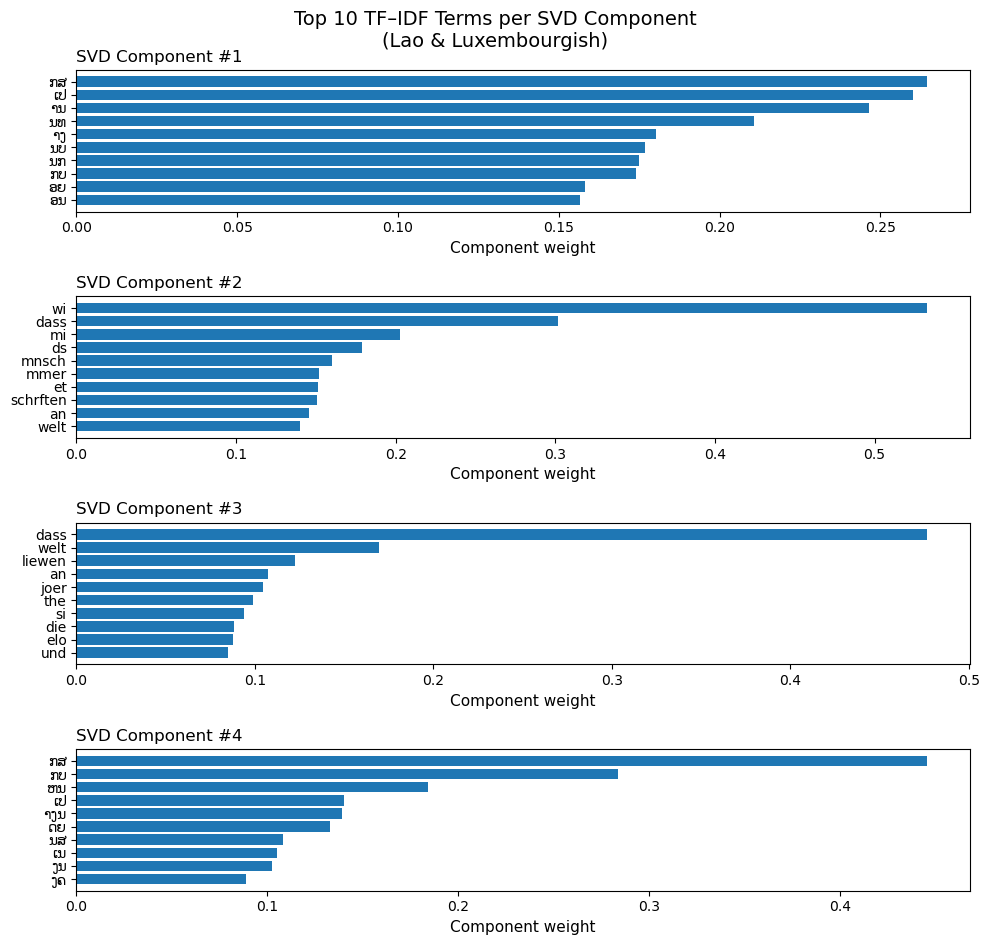

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# ——— your existing TF–IDF & SVD steps here ———
# docs = [...]
# vectorizer = TfidfVectorizer(…)
# X_tfidf = vectorizer.fit_transform(docs)
# svd = TruncatedSVD(…)
# X_svd = svd.fit_transform(X_tfidf)

terms      = vectorizer.get_feature_names_out()
components = svd.components_       # shape: (n_components, n_terms)

K     = min(5, components.shape[0])  # first 5 components
TOP_N = 10                            # top 10 terms each

fig, axes = plt.subplots(K, 1,
                         figsize=(10, 2.5 * K),
                         constrained_layout=False)  # we'll do manual adjust
axes = np.atleast_1d(axes)

for i, ax in enumerate(axes):
    comp        = components[i]
    top_idx     = np.argsort(comp)[::-1][:TOP_N]
    top_terms   = terms[top_idx]
    top_weights = comp[top_idx]

    y_pos = np.arange(TOP_N)
    ax.barh(y_pos, top_weights, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_terms, fontsize=10)
    ax.invert_yaxis()
    ax.set_xlabel("Component weight", fontsize=11)
    ax.set_title(f"SVD Component #{i+1}", loc="left", fontsize=12)

# Give main title some room
fig.suptitle("Top 10 TF–IDF Terms per SVD Component\n(Lao & Luxembourgish)", 
             fontsize=14, y=0.94)

# Now tighten and then bump top margin up
plt.tight_layout()
plt.subplots_adjust(top=0.88, hspace=0.6)  # hspace makes vertical gaps bigger

plt.show()


### Word Embedding

In [67]:
from gensim.models import FastText
from gensim.models import Word2Vec
import logging

# Assuming these variables are defined elsewhere as pre-processed text strings:
# processed_lao_bot, processed_lao_human,
# processed_luxembourgish_bot, processed_luxembourgish_human

# Prepare the data
processed_texts_lao_bot            = [processed_lao_bot.split()]
processed_texts_lao_human         = [processed_lao_human.split()]
processed_texts_luxembourgish_bot = [processed_luxembourgish_bot.split()]
processed_texts_luxembourgish_human = [processed_luxembourgish_human.split()]

# Train FastText models
fasttext_model_lao = FastText(
    processed_texts_lao_bot,
    vector_size=10,
    window=3,
    min_count=1,
    workers=4,
    sg=1
)

fasttext_model_lao_human = FastText(
    processed_texts_lao_human,
    vector_size=10,
    window=3,
    min_count=1,
    workers=4,
    sg=1
)

fasttext_model_luxembourgish = FastText(
    processed_texts_luxembourgish_bot,
    vector_size=10,
    window=3,
    min_count=1,
    workers=4,
    sg=1
)

fasttext_model_luxembourgish_human = FastText(
    processed_texts_luxembourgish_human,
    vector_size=10,
    window=3,
    min_count=1,
    workers=4,
    sg=1
)

# Save the models
fasttext_model_lao.save("fasttext_gpt_kanuri.model")
print("FastText Lao bot model trained and saved.")

fasttext_model_lao_human.save("fasttext_corpus_kanuri.model")
print("FastText Lao human model trained and saved.")

fasttext_model_luxembourgish.save("fasttext_gpt_miskito.model")
print("FastText Luxembourgish bot model trained and saved.")

fasttext_model_luxembourgish_human.save("fasttext_corpus_miskito.model")
print("FastText Luxembourgish human model trained and saved.")


FastText Lao bot model trained and saved.
FastText Lao human model trained and saved.
FastText Luxembourgish bot model trained and saved.
FastText Luxembourgish human model trained and saved.


In [68]:
# Train a Word2Vec model
word2vec_model_lao_bot             = Word2Vec(processed_texts_lao_bot,             vector_size=10, window=3, min_count=2, workers=4)
word2vec_model_lao_human           = Word2Vec(processed_texts_lao_human,           vector_size=10, window=3, min_count=2, workers=4)
word2vec_model_luxembourgish_bot   = Word2Vec(processed_texts_luxembourgish_bot,   vector_size=10, window=3, min_count=2, workers=4)
word2vec_model_luxembourgish_human = Word2Vec(processed_texts_luxembourgish_human, vector_size=10, window=3, min_count=2, workers=4)

word2vec_model_lao_bot.save("word2vec_gpt_lao.model")
print("Word2Vec Lao bot model trained and saved.")

word2vec_model_lao_human.save("word2vec_corpus_lao.model")
print("Word2Vec Lao human model trained and saved.")

word2vec_model_luxembourgish_bot.save("word2vec_gpt_luxembourgish.model")
print("Word2Vec Luxembourgish bot model trained and saved.")

word2vec_model_luxembourgish_human.save("word2vec_corpus_luxembourgish.model")
print("Word2Vec Luxembourgish human model trained and saved.")


Word2Vec Lao bot model trained and saved.
Word2Vec Lao human model trained and saved.
Word2Vec Luxembourgish bot model trained and saved.
Word2Vec Luxembourgish human model trained and saved.


In [69]:
!pip install tensorflow-cpu tensorflow-hub


Defaulting to user installation because normal site-packages is not writeable


In [73]:
import os
import tarfile
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# 1) Helper to download & extract the USE v4 module
def download_and_extract_use(module_url, extract_dir="use_4"):
    # Force TF-Hub to get the compressed .tar.gz version
    compressed_path = tf.keras.utils.get_file(
        fname="use_4.tar.gz",
        origin=module_url + "?tf-hub-format=compressed",
        untar=False
    )
    # Make sure our target folder exists
    os.makedirs(extract_dir, exist_ok=True)
    # Extract the .tar.gz into extract_dir
    with tarfile.open(compressed_path, "r:gz") as tar:
        tar.extractall(path=extract_dir)
    return extract_dir

# 2) Download + extract into ./use_4
local_use_dir = download_and_extract_use(
    "https://tfhub.dev/google/universal-sentence-encoder/4"
)

# 3) Create the KerasLayer from that local folder
use_layer = hub.KerasLayer(
    local_use_dir,
    input_shape=[],   # accepts a 1-D tensor of strings
    dtype=tf.string,
    trainable=False
)

# 4) Your segmenter (chunks of 40 words)
def segment_text(text, chunk_size=40):
    words = text.split()
    return [' '.join(words[i:i + chunk_size]) 
            for i in range(0, len(words), chunk_size)]

# 5) Prepare your corpora (make sure these are defined)
corpus_lao_bot             = segment_text(processed_lao_bot)
corpus_lao_human           = segment_text(processed_lao_human)
corpus_luxembourgish_bot   = segment_text(processed_luxembourgish_bot)
corpus_luxembourgish_human = segment_text(processed_luxembourgish_human)

# 6) Compute embeddings
def compute_use_embeddings(corpus):
    inputs = tf.constant(corpus)
    return use_layer(inputs).numpy()

vectors_lao_bot_use             = compute_use_embeddings(corpus_lao_bot)
vectors_lao_human_use           = compute_use_embeddings(corpus_lao_human)
vectors_lux_bot_use             = compute_use_embeddings(corpus_luxembourgish_bot)
vectors_lux_human_use           = compute_use_embeddings(corpus_luxembourgish_human)

# 7) Inspect shapes
print("Lao Bot USE Embedding Shape:           ", vectors_lao_bot_use.shape)
print("Lao Human USE Embedding Shape:         ", vectors_lao_human_use.shape)
print("Luxembourgish Bot USE Embedding Shape: ", vectors_lux_bot_use.shape)
print("Luxembourgish Human USE Embedding Shape:", vectors_lux_human_use.shape)

# 8) (Optional) Save them out
np.save("lao_bot_use.npy", vectors_lao_bot_use)
np.save("lao_human_use.npy", vectors_lao_human_use)
np.save("luxembourgish_bot_use.npy", vectors_lux_bot_use)
np.save("luxembourgish_human_use.npy", vectors_lux_human_use)


C:\Users\Taqi\AppData\Local\Temp\ipykernel_19204\1320061213.py:19: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_dir)


Lao Bot USE Embedding Shape:            (649, 512)
Lao Human USE Embedding Shape:          (4209, 512)
Luxembourgish Bot USE Embedding Shape:  (402, 512)
Luxembourgish Human USE Embedding Shape: (6340, 512)


In [75]:
# Get the number of unique segments
unique_segments_sizes = {
    "Lao Bot USE": len(np.unique(processed_texts_lao_bot)),
    "Lao Human USE": len(np.unique(processed_texts_lao_human)),
    "Luxembourgish Bot USE": len(np.unique(processed_texts_luxembourgish_bot)),
    "Luxembourgish Human USE": len(np.unique(processed_texts_luxembourgish_human))
}

vals = []
print("Unique Segments Sizes for USE:")
for dataset, size in unique_segments_sizes.items():
    print(f"{dataset}: {size}")
    vals.append(size)


Unique Segments Sizes for USE:
Lao Bot USE: 7809
Lao Human USE: 51688
Luxembourgish Bot USE: 3873
Luxembourgish Human USE: 23592


In [77]:
from gensim.models import Word2Vec, FastText
import os

# --- Real corpora built from your preprocessed texts ---
# Ensure these variables exist and contain cleaned, space-separated tokens:
#   processed_lao_bot, processed_lao_human,
#   processed_luxembourgish_bot, processed_luxembourgish_human
corpus_lao = [processed_lao_bot.split(), processed_lao_human.split()]
corpus_luxembourgish = [processed_luxembourgish_bot.split(), processed_luxembourgish_human.split()]

# --- Helper for Word2Vec (load or train) ---
def safe_load_word2vec(filepath, corpus=None):
    if os.path.exists(filepath):
        print(f"Loading Word2Vec model from {filepath}...")
        return Word2Vec.load(filepath)
    elif corpus:
        print(f"Training Word2Vec model for {filepath}...")
        model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=2, workers=4)
        model.save(filepath)
        return model
    else:
        print(f"Warning: {filepath} not found and no corpus provided.")
        return None

# --- Helper for FastText (always train on corpus, load only if no corpus) ---
def safe_load_fasttext(filepath, corpus=None):
    if corpus:
        # force retrain on real data
        print(f"Training FastText model for {filepath}...")
        model = FastText(sentences=corpus, vector_size=100, window=5, min_count=2, workers=4)
        model.save(filepath)
        return model
    elif os.path.exists(filepath):
        print(f"Loading FastText model from {filepath}...")
        return FastText.load(filepath)
    else:
        print(f"Warning: {filepath} not found and no corpus provided.")
        return None

# --- Train/load corpus models on real data ---
word2vec_corpus_lao = safe_load_word2vec("word2vec_corpus_lao.model", corpus_lao)
fasttext_corpus_lao = safe_load_fasttext("fasttext_corpus_lao.model", corpus_lao)

word2vec_corpus_luxembourgish = safe_load_word2vec("word2vec_corpus_luxembourgish.model", corpus_luxembourgish)
fasttext_corpus_luxembourgish = safe_load_fasttext("fasttext_corpus_luxembourgish.model", corpus_luxembourgish)

# --- Load GPT-fine-tuned models (assumed to exist) ---
word2vec_gpt_lao = safe_load_word2vec("word2vec_gpt_lao.model")
fasttext_gpt_lao = safe_load_fasttext("fasttext_gpt_lao.model")

word2vec_gpt_luxembourgish = safe_load_word2vec("word2vec_gpt_luxembourgish.model")
fasttext_gpt_luxembourgish = safe_load_fasttext("fasttext_gpt_luxembourgish.model")

# --- Compute vocabulary sizes ---
def get_vocab_size(model):
    return len(model.wv) if model else 0

vocab_sizes = {
    "Corpus Lao": {"Word2Vec": get_vocab_size(word2vec_corpus_lao), "FastText": get_vocab_size(fasttext_corpus_lao)},
    "Corpus Luxembourgish": {"Word2Vec": get_vocab_size(word2vec_corpus_luxembourgish), "FastText": get_vocab_size(fasttext_corpus_luxembourgish)},
    "GPT Lao": {"Word2Vec": get_vocab_size(word2vec_gpt_lao), "FastText": get_vocab_size(fasttext_gpt_lao)},
    "GPT Luxembourgish": {"Word2Vec": get_vocab_size(word2vec_gpt_luxembourgish), "FastText": get_vocab_size(fasttext_gpt_luxembourgish)},
}

# --- Display vocabulary sizes ---
print("\nVocabulary Sizes:")
for name, sizes in vocab_sizes.items():
    print(f"{name}: Word2Vec={sizes['Word2Vec']}, FastText={sizes['FastText']}")


Loading Word2Vec model from word2vec_corpus_lao.model...
Training FastText model for fasttext_corpus_lao.model...
Loading Word2Vec model from word2vec_corpus_luxembourgish.model...
Training FastText model for fasttext_corpus_luxembourgish.model...
Loading Word2Vec model from word2vec_gpt_lao.model...
Loading FastText model from fasttext_gpt_lao.model...
Loading Word2Vec model from word2vec_gpt_luxembourgish.model...
Loading FastText model from fasttext_gpt_luxembourgish.model...

Vocabulary Sizes:
Corpus Lao: Word2Vec=12094, FastText=13718
Corpus Luxembourgish: Word2Vec=23592, FastText=24283
GPT Lao: Word2Vec=1878, FastText=7728
GPT Luxembourgish: Word2Vec=1585, FastText=3870


In [79]:
import pandas as pd

# Flatten
data_for_df = []
for dataset, models in vocab_sizes.items():
    for model, size in models.items():
        data_for_df.append({
            "Dataset": dataset,
            "Model": model,
            "Vocabulary Size": size
        })

df_vocab_sizes = pd.DataFrame(data_for_df)

# In Jupyter this will render as a table:
df_vocab_sizes


Dataset     Model  Vocabulary Size
0            Corpus Lao  Word2Vec            12094
1            Corpus Lao  FastText            13718
2  Corpus Luxembourgish  Word2Vec            23592
3  Corpus Luxembourgish  FastText            24283
4               GPT Lao  Word2Vec             1878
5               GPT Lao  FastText             7728
6     GPT Luxembourgish  Word2Vec             1585
7     GPT Luxembourgish  FastText             3870

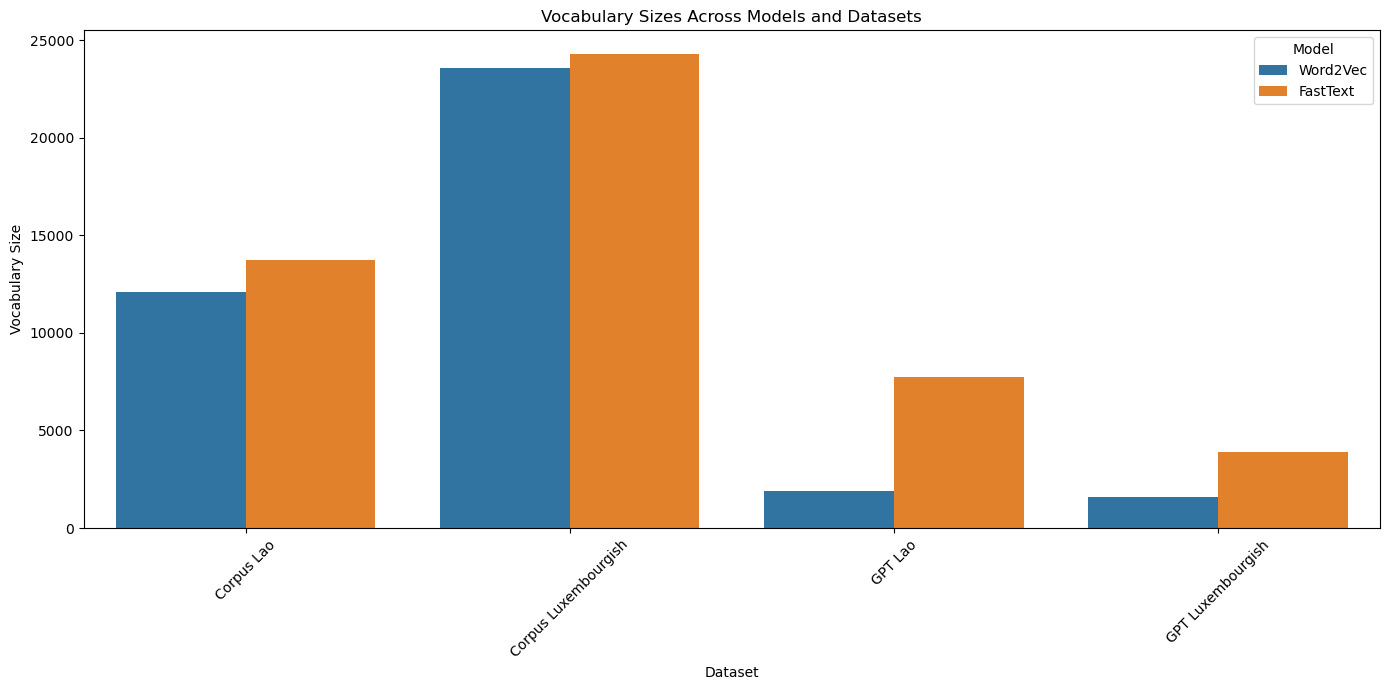

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x="Dataset", y="Vocabulary Size", hue="Model", data=df_vocab_sizes)
plt.title('Vocabulary Sizes Across Models and Datasets')
plt.xticks(rotation=45)

# Save the figure BEFORE plt.show()
plt.tight_layout()  # Optional: avoids clipping of labels
plt.savefig("vocabulary_sizes.png", dpi=300)  # Save at 300 DPI

plt.show()


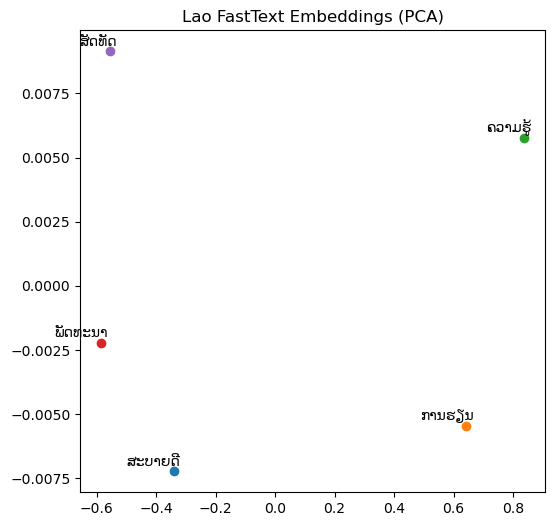

In [83]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import FastText
import numpy as np
from sklearn.decomposition import PCA

# ——— Lao ———
fasttext_model_lao = FastText.load("fasttext_corpus_lao.model")

words = ['ສະບາຍດີ', 'ການຮຽນ', 'ຄວາມຮູ້', 'ພັດທະນາ', 'ສັດທັດ']
word_vectors = [fasttext_model_lao.wv[w] for w in words]

word_vectors_array = np.array(word_vectors)
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(word_vectors_array)

plt.figure(figsize=(6, 6))
for i, label in enumerate(words):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.title("Lao FastText Embeddings (PCA)")
plt.show()


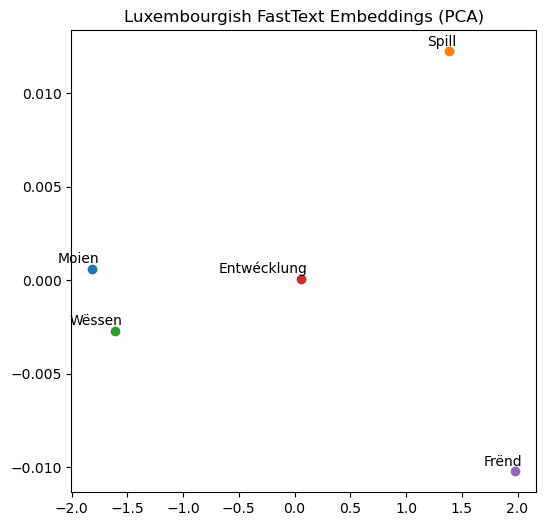

In [85]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import FastText
import numpy as np
from sklearn.decomposition import PCA

# ——— Luxembourgish ———
fasttext_model_lux = FastText.load("fasttext_corpus_luxembourgish.model")

words = ['Moien', 'Spill', 'Wëssen', 'Entwécklung', 'Frënd']
word_vectors = [fasttext_model_lux.wv[w] for w in words]

word_vectors_array = np.array(word_vectors)
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(word_vectors_array)

plt.figure(figsize=(6, 6))
for i, label in enumerate(words):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.title("Luxembourgish FastText Embeddings (PCA)")
plt.show()


## Entropy-Complexity Plane implementation


In [321]:
"""
import numpy as np
from itertools import permutations

#Shannon's entropy
def entropy(P):
  P = P[P != 0]
  return - np.sum(P * np.log(P))

#Normalized Shannon's entropy
def normalized_entropy(P):
  N = len(P)
  P_e = np.ones(N) / N

  S_max = entropy(P_e)
  S = entropy(P)
  return S / S_max


 #Jensen-Shannon divergence
def divergence(P_1, P_2, Q_0):
  return Q_0 * (
                entropy((P_1 + P_2) / 2) -
                entropy(P_1) / 2 -
                entropy(P_2) / 2
                )

#Normalizing constant
def Q_0(dist):
  #len(dist) = D!

  return 1 / (np.log(2 * len(dist)) +
              (len(dist) + 1) * np.log(1 / (len(dist) + 1)) /  len(dist) / 2  -
              np.log(len(dist)) / 2)

#Complexity
def complexity(P):
  H_S = normalized_entropy(P)

  N = len(P)
  P_e = np.ones(N) / N


  Q_J = divergence(P, P_e, Q_0(P))

  return Q_J * H_S




## This is the function to get the distribution from time series ##
def get_distribution(time_series, D=3):
  M = len(time_series)

  #Get the permutation variants and get the indices for them
  perms = list(permutations(range(D)))
  perms_to_idx = dict(zip(perms, range(len(perms))))

  #Preare the array for distribution
  distribution = np.zeros(len(perms_to_idx))

  #For every z-vector add 1 to the permutation count
  for i in range(M - D + 1):
    z_vector = time_series[i:i+D]
    permut = tuple(np.argsort(z_vector))
    distribution[perms_to_idx[permut]] += 1

  #Normalize
  distribution /= (M - D + 1)
  return distribution

## Compute entropy-complexity for a given t.s. ##
def entropy_complexity(time_series, D):
  P = get_distribution(time_series, D=D)
  return normalized_entropy(P), complexity(P)
"""

SyntaxError: incomplete input (1096481094.py, line 75)

In [311]:
# entropy_complexity_sliding.py
# -----------------------------------------
# Sliding‐window entropy–complexity analysis for Lao & Luxembourgish texts
# using Bandt–Pompe (D=6, τ=1), window=2000, step=1000.
"""
import numpy as np
import matplotlib.pyplot as plt
import math
from pathlib import Path
#import entropy_complexity  # your module from entropy_complexity.py

# 1. Load texts and convert to numeric series (Unicode code points)
files = {
    'Lao – Bot':   Path('dataset/bot_data_lao.txt'),
    'Lao – Human': Path('dataset/human_data_lao.txt'),
    'Lux – Bot':   Path('dataset/bot_data_luxembourgish.txt'),
    'Lux – Human': Path('dataset/human_data_luxembourgish.txt'),
}
series = {}
for name, path in files.items():
    text = path.read_text(encoding='utf-8')
    series[name] = np.array([ord(c) for c in text], dtype=float)

# 2. Sliding‐window parameters
window_size = 2000
step_size   = 1000
D_ord       = 6
all_HC      = {}

# 3. Compute H,C for each window of each series
for name, ts in series.items():
    HC = []
    for start in range(0, len(ts) - window_size + 1, step_size):
        seg = ts[start:start+window_size]
        # call the correct function signature from entropy_complexity.py
        H, C = entropy_complexity(seg, D=D_ord)
        HC.append((H, C))
    all_HC[name] = np.array(HC)

# 4. Compute theoretical bounds (lower and upper) for D_ord
points = 300
# Lower bound: C = 0 for H in [0,1]
lower = np.column_stack((np.linspace(0, 1, points), np.zeros(points)))
# Upper bound: one‐parameter family P = [p, (1−p)/(n−1), …]
n = math.factorial(D_ord)
hs, cs = [], []
for p in np.linspace(0, 1, points):
    P = np.array([p] + [(1 - p) / (n - 1)] * (n - 1))
    hs.append(normalized_entropy(P))
    cs.append(complexity(P))
upper = np.column_stack((hs, cs))

# 5. Plot the entropy–complexity “cloud”
plt.figure(figsize=(6,6))
plt.plot(lower[:,0], lower[:,1], 'r-', lw=1)
plt.plot(upper[:,0], upper[:,1], 'r-', lw=1, label='theoretical bounds')
plt.fill_between(upper[:,0], 0, upper[:,1], color='r', alpha=0.1)

for name, hc in all_HC.items():
    Hs, Cs = hc[:,0], hc[:,1]
    plt.scatter(Hs, Cs, s=8, alpha=0.6, label=name)

plt.xlabel('Normalized Entropy H')
plt.ylabel('Statistical Complexity C')
plt.title(f'Entropy–Complexity Plane (D={D_ord}, window={window_size}, step={step_size})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, upper[:,1].max() * 1.05)
plt.tight_layout()
plt.show()

"""
# 6. Print average H,C per series
print("Average Entropy & Complexity values:")
for name, hc in all_HC.items():
    mean_H, mean_C = hc.mean(axis=0)
    print(f"  • {name:20s} → H = {mean_H:.3f},  C = {mean_C:.3f}")
"""

TypeError: 'module' object is not callable

In [315]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition       import TruncatedSVD
import entropy_complexity         # your module from entropy_complexity.py


# 2) Make sure you include all four lists in your “context”:
datasets = {
    'Lao – Bot':   Path('dataset/bot_data_lao.txt'),
    'Lao – Human': Path('dataset/human_data_lao.txt'),
    'Lux – Bot':   Path('dataset/bot_data_luxembourgish.txt'),
    'Lux – Human': Path('dataset/human_data_luxembourgish.txt'),
}

# 3) Build TF–IDF on those four “documents”:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition       import TruncatedSVD

vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
docs = [path.read_text(encoding="utf-8") for path in datasets.values()]
X_tfidf    = vectorizer.fit_transform(docs)    # shape = (4 × V)


# 4) Now you have 4 features (one per “doc”), so you can do an SVD up to 4dims:
d_semantic = 4    # ≤ number of docs
svd        = TruncatedSVD(n_components=d_semantic, random_state=42)
Wemb       = svd.fit_transform(X_tfidf.T)      # now shape = (V, 4)


# ——— 5. Sliding-window parameters ———
window_size = 2000   # or whatever makes sense (≥ factorial limits!)
step_size   = 1000


# ——— 6. Compute H,C on each window ———
D_ord = 6
all_HC = {}
for name, ts in series.items():
    HC = []
    for start in range(0, len(ts) - window_size + 1, step_size):
        seg = ts[start:start+window_size]
        H, C = entropy_complexity.entropy_complexity_time_series(seg, D_ord)
        HC.append((H,C))
    all_HC[name] = np.array(HC)



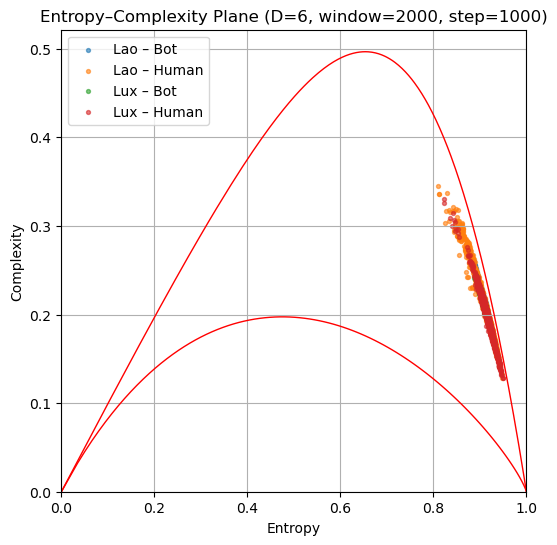

Entropy & Complexity values:
  • Lao – Bot            → H = 0.899,  C = 0.234
  • Lao – Human          → H = 0.910,  C = 0.209
  • Lux – Bot            → H = 0.907,  C = 0.213
  • Lux – Human          → H = 0.915,  C = 0.199


In [319]:
# ——— 7. Load theoretical borders for D_ord ———
borders = np.load('borders.npy', allow_pickle=True).item()[D_ord]
lower, upper = borders


# ——— 8. Plot the “cloud” just like your reference ———
plt.figure(figsize=(6,6))
plt.plot(lower[:,0], lower[:,1], 'r-', lw=1)
plt.plot(upper[:,0], upper[:,1], 'r-', lw=1)

for name, hc in all_HC.items():
    Hs, Cs = hc[:,0], hc[:,1]
    plt.scatter(Hs, Cs, s=8, alpha=0.6, label=name)

plt.xlabel('Entropy')
plt.ylabel('Complexity')
plt.title(f'Entropy–Complexity Plane (D={D_ord}, window={window_size}, step={step_size})')
plt.legend()
plt.grid(True)
plt.xlim(0,1)
plt.ylim(0, upper[:,1].max()*1.05)
plt.savefig('entropy_complexity_plane.png', dpi=300, bbox_inches='tight')
plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# 9. Print the numeric results
# ─────────────────────────────────────────────────────────────────────────────
ec = {}
for name, hc in all_HC.items():
    mean_H, mean_C = hc.mean(axis=0)
    ec[name] = (mean_H, mean_C)

print("Entropy & Complexity values:")
for name,(H,C) in ec.items():
    print(f"  • {name:20s} → H = {H:.3f},  C = {C:.3f}")

## 1.2 Wishart Clustering Algorithm


In [95]:
!pip install hdbscan
!pip install dbscan1d

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
import warnings
from dbscan1d.core import DBSCAN1D

In [99]:

from nltk import ngrams
import numpy as np

# 1) N-gram helper functions
def generate_ngrams(text_tokens, n=3):
    """Generate n-grams from a list of tokens."""
    return [ng for ng in ngrams(text_tokens, n)]

def ngram_to_vector(ngram, model):
    """Concatenate the word vectors for each word in the n-gram (zero if OOV)."""
    dim = model.vector_size
    return np.concatenate([
        model.wv[word] if word in model.wv else np.zeros(dim)
        for word in ngram
    ])

def create_ngram_dataset(texts, model, n=3):
    """Create unique n-gram vectors from token lists using a word2vec/fasttext model."""
    all_ngrams, all_vecs = [], []
    seen = set()
    for tokens in texts:
        for ng in generate_ngrams(tokens, n):
            tpl = tuple(ng)
            if tpl not in seen:
                seen.add(tpl)
                all_ngrams.append(tpl)
                all_vecs.append(ngram_to_vector(ng, model))
    return all_ngrams, np.array(all_vecs)

def create_ngram_dataset_use(embeddings, n=3):
    """Create unique n-gram vectors from a list of USE embeddings."""
    all_ngrams, all_vecs = [], []
    seen = set()
    for i in range(len(embeddings) - n + 1):
        flat = np.concatenate(embeddings[i:i+n])
        key = tuple(flat)
        if key not in seen:
            seen.add(key)
            all_ngrams.append(key)
            all_vecs.append(flat)
    return all_ngrams, np.array(all_vecs)


# 2) Tokenize your Lao & Luxembourgish texts
processed_texts_lao_bot            = processed_lao_bot.split()
processed_texts_lao_human          = processed_lao_human.split()
processed_texts_lux_bot            = processed_luxembourgish_bot.split()
processed_texts_lux_human          = processed_luxembourgish_human.split()


# 3) Ensure USE embeddings are computed
vectors_lao_bot_use             = compute_use_embeddings(corpus_lao_bot)
vectors_lao_human_use           = compute_use_embeddings(corpus_lao_human)
vectors_luxembourgish_bot_use   = compute_use_embeddings(corpus_luxembourgish_bot)
vectors_luxembourgish_human_use = compute_use_embeddings(corpus_luxembourgish_human)


# 4) Generate Word2Vec-based n-grams
ngrams_lao_bot, vectors_lao_bot           = create_ngram_dataset(
    [processed_texts_lao_bot], word2vec_corpus_lao)
ngrams_lao_human, vectors_lao_human       = create_ngram_dataset(
    [processed_texts_lao_human], word2vec_corpus_lao)
ngrams_lux_bot, vectors_lux_bot           = create_ngram_dataset(
    [processed_texts_lux_bot], word2vec_corpus_luxembourgish)
ngrams_lux_human, vectors_lux_human       = create_ngram_dataset(
    [processed_texts_lux_human], word2vec_corpus_luxembourgish)


# 5) Generate FastText-based n-grams
ngrams_lao_bot_ft, vectors_lao_bot_ft     = create_ngram_dataset(
    [processed_texts_lao_bot], fasttext_corpus_lao)
ngrams_lao_human_ft, vectors_lao_human_ft = create_ngram_dataset(
    [processed_texts_lao_human], fasttext_corpus_lao)
ngrams_lux_bot_ft, vectors_lux_bot_ft     = create_ngram_dataset(
    [processed_texts_lux_bot], fasttext_corpus_luxembourgish)
ngrams_lux_human_ft, vectors_lux_human_ft = create_ngram_dataset(
    [processed_texts_lux_human], fasttext_corpus_luxembourgish)


# 6) Generate USE-based n-grams
ngrams_lao_bot_use, vectors_lao_bot_use_ngrams             = create_ngram_dataset_use(vectors_lao_bot_use)
ngrams_lao_human_use, vectors_lao_human_use_ngrams         = create_ngram_dataset_use(vectors_lao_human_use)
ngrams_lux_bot_use, vectors_lux_bot_use_ngrams             = create_ngram_dataset_use(vectors_luxembourgish_bot_use)
ngrams_lux_human_use, vectors_lux_human_use_ngrams         = create_ngram_dataset_use(vectors_luxembourgish_human_use)


# 7) Print out your counts
print(f"Word2Vec Lao bot      n-grams: {len(ngrams_lao_bot)}")
print(f"Word2Vec Lao human    n-grams: {len(ngrams_lao_human)}")
print(f"Word2Vec Lux bot      n-grams: {len(ngrams_lux_bot)}")
print(f"Word2Vec Lux human    n-grams: {len(ngrams_lux_human)}")
print("-"*60)
print(f"FastText Lao bot      n-grams: {len(ngrams_lao_bot_ft)}")
print(f"FastText Lao human    n-grams: {len(ngrams_lao_human_ft)}")
print(f"FastText Lux bot      n-grams: {len(ngrams_lux_bot_ft)}")
print(f"FastText Lux human    n-grams: {len(ngrams_lux_human_ft)}")
print("-"*60)
print(f"USE Lao bot           n-grams: {len(ngrams_lao_bot_use)}")
print(f"USE Lao human         n-grams: {len(ngrams_lao_human_use)}")
print(f"USE Lux bot           n-grams: {len(ngrams_lux_bot_use)}")
print(f"USE Lux human         n-grams: {len(ngrams_lux_human_use)}")



Word2Vec Lao bot      n-grams: 20714
Word2Vec Lao human    n-grams: 131079
Word2Vec Lux bot      n-grams: 15414
Word2Vec Lux human    n-grams: 117475
------------------------------------------------------------
FastText Lao bot      n-grams: 20714
FastText Lao human    n-grams: 131079
FastText Lux bot      n-grams: 15414
FastText Lux human    n-grams: 117475
------------------------------------------------------------
USE Lao bot           n-grams: 647
USE Lao human         n-grams: 4207
USE Lux bot           n-grams: 400
USE Lux human         n-grams: 6338


In [105]:
import numpy as np
from scipy.special import gamma
from sklearn.neighbors import KDTree
from collections import defaultdict

class Wishart:
    def __init__(self, wishart_neighbors, significance_level):
        self.wishart_neighbors = wishart_neighbors
        self.significance_level = significance_level

    def fit(self, X):
        kdt = KDTree(X, metric='euclidean')
        distances, neighbors = kdt.query(X, k=self.wishart_neighbors + 1, return_distance=True)
        neighbors = neighbors[:, 1:]
        distances = distances[:, -1]
        order = np.argsort(distances)

        n_samples, dim = X.shape
        self.object_labels = np.full(n_samples, -1, dtype=int)
        self.clusters = np.array([(1.0, 1.0, 0.0)])
        self.clusters_to_objects = defaultdict(list)

        for idx in order:
            neigh_idxs = neighbors[idx]
            neigh_labels = self.object_labels[neigh_idxs]
            valid = neigh_labels[neigh_labels != -1]
            if valid.size == 0:
                self._create_new_cluster(idx, distances[idx])
            else:
                uniq = np.unique(valid)
                if uniq.size == 1:
                    cl = uniq[0]
                    if self.clusters[cl, -1] < 0.5:
                        self._add_elem_to_exist_cluster(idx, distances[idx], cl)
                    else:
                        self._add_elem_to_noise(idx)
                else:
                    my_clusters = self.clusters[uniq]
                    flags = my_clusters[:, -1]
                    if flags.min() > 0.5:
                        self._add_elem_to_noise(idx)
                    else:
                        # compute significance
                        sig = (np.power(np.maximum(my_clusters[:,0],1e-10), -dim)
                               - np.power(np.maximum(my_clusters[:,1],1e-10), -dim))
                        sig *= self.wishart_neighbors / n_samples
                        sig /= np.pi**(dim/2)
                        sig *= gamma(dim/2 + 1)
                        mask = sig >= self.significance_level
                        sig_clusters = uniq[mask]
                        nonsig_clusters = uniq[~mask]
                        if sig_clusters.size > 1 or uniq.min() == 0:
                            self._add_elem_to_noise(idx)
                            self.clusters[sig_clusters, -1] = 1.0
                            for c in nonsig_clusters:
                                if c==0: continue
                                for j in self.clusters_to_objects[c]:
                                    self._add_elem_to_noise(j)
                                self.clusters_to_objects[c].clear()
                        else:
                            keep = uniq.min()
                            for c in uniq:
                                if c == keep: continue
                                for j in self.clusters_to_objects[c]:
                                    self._add_elem_to_exist_cluster(j, distances[j], keep)
                                self.clusters_to_objects[c].clear()
                            self._add_elem_to_exist_cluster(idx, distances[idx], keep)

        return self._clean_labels()

    def _create_new_cluster(self, idx, dist):
        label = len(self.clusters)
        self.object_labels[idx] = label
        self.clusters_to_objects[label].append(idx)
        self.clusters = np.vstack([self.clusters, [dist, dist, 0.0]])

    def _add_elem_to_exist_cluster(self, idx, dist, label):
        self.object_labels[idx] = label
        self.clusters_to_objects[label].append(idx)
        self.clusters[label, 0] = min(self.clusters[label,0], dist)
        self.clusters[label, 1] = max(self.clusters[label,1], dist)

    def _add_elem_to_noise(self, idx):
        self.object_labels[idx] = 0
        self.clusters_to_objects[0].append(idx)

    def _clean_labels(self):
        uniq = np.unique(self.object_labels)
        new_labels = np.zeros_like(self.object_labels)
        for new, old in enumerate(uniq):
            new_labels[self.object_labels == old] = new
        return new_labels


# === Example usage for Lao & Luxembourgish ===

# 1) Assume you already have your USE embeddings computed:
#    vectors_lao_bot_use, vectors_lao_human_use,
#    vectors_luxembourgish_bot_use, vectors_luxembourgish_human_use

# 2) Cluster Lao “bot” segments
wish_lao_bot = Wishart(wishart_neighbors=10, significance_level=0.05)
labels_lao_bot = wish_lao_bot.fit(vectors_lao_bot_use)
print("Lao bot cluster labels:", np.unique(labels_lao_bot))

# 3) Cluster Lao “human” segments
wish_lao_human = Wishart(wishart_neighbors=10, significance_level=0.05)
labels_lao_human = wish_lao_human.fit(vectors_lao_human_use)
print("Lao human cluster labels:", np.unique(labels_lao_human))

# 4) Cluster Luxembourgish “bot” segments
wish_lux_bot = Wishart(wishart_neighbors=10, significance_level=0.05)
labels_lux_bot = wish_lux_bot.fit(vectors_luxembourgish_bot_use)
print("Luxembourgish bot cluster labels:", np.unique(labels_lux_bot))

# 5) Cluster Luxembourgish “human” segments
wish_lux_human = Wishart(wishart_neighbors=10, significance_level=0.05)
labels_lux_human = wish_lux_human.fit(vectors_luxembourgish_human_use)
print("Luxembourgish human cluster labels:", np.unique(labels_lux_human))


C:\Users\Taqi\AppData\Local\Temp\ipykernel_19204\2581732270.py:48: RuntimeWarning: invalid value encountered in multiply
  sig *= gamma(dim/2 + 1)


Lao bot cluster labels: [0]


C:\Users\Taqi\AppData\Local\Temp\ipykernel_19204\2581732270.py:48: RuntimeWarning: invalid value encountered in multiply
  sig *= gamma(dim/2 + 1)


Lao human cluster labels: [0 1 2 3 4 5 6 7 8 9]


C:\Users\Taqi\AppData\Local\Temp\ipykernel_19204\2581732270.py:48: RuntimeWarning: invalid value encountered in multiply
  sig *= gamma(dim/2 + 1)


Luxembourgish bot cluster labels: [0 1 2]
Luxembourgish human cluster labels: [0 1 2 3 4 5 6 7 8]


C:\Users\Taqi\AppData\Local\Temp\ipykernel_19204\2581732270.py:48: RuntimeWarning: invalid value encountered in multiply
  sig *= gamma(dim/2 + 1)


Wishart: 100%|██████████████████████████████████████████████████████████████████| 6340/6340 [00:00<00:00, 22467.66it/s]


model lang   type  ngrams                       fn  clusters
0   Word2Vec  Lao    bot   20714              lao_bot_w2v         4
1   Word2Vec  Lao  human  131079            lao_human_w2v        14
2   Word2Vec  Lux    bot   15414              lux_bot_w2v         3
3   Word2Vec  Lux  human  117475            lux_human_w2v        18
4   FastText  Lao    bot   20714               lao_bot_ft        30
5   FastText  Lao  human  131079             lao_human_ft        68
6   FastText  Lux    bot   15414               lux_bot_ft        36
7   FastText  Lux  human  117475             lux_human_ft       163
8        USE  Lao    bot     647              lao_bot_use         1
9        USE  Lao  human    4207            lao_human_use         3
10       USE  Lux    bot     400    luxembourgish_bot_use         3
11       USE  Lux  human    6338  luxembourgish_human_use         4

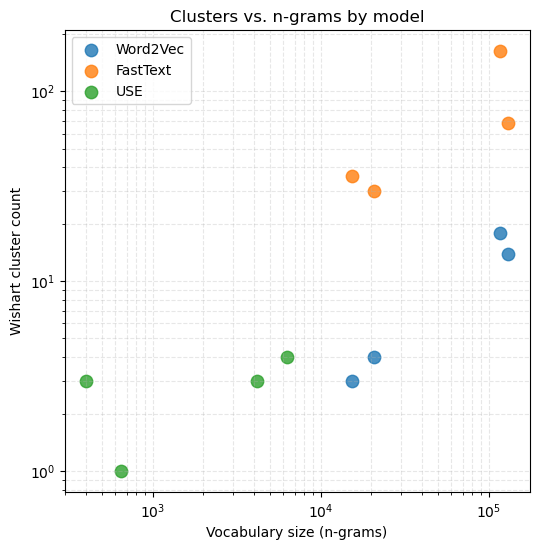

In [113]:
# 0) Imports
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
from collections           import defaultdict
from sklearn.neighbors     import KDTree
from scipy.special         import gamma
from tqdm                  import tqdm
from gensim.models         import Word2Vec, FastText

# 1) (Re-)export your gensim vectors to .npy if you haven’t already
# — Word2Vec Lao
w2v_gpt_lao    = Word2Vec.load("word2vec_gpt_lao.model")
np.save("lao_bot_w2v.npy",    w2v_gpt_lao.wv.vectors)
w2v_corpus_lao = Word2Vec.load("word2vec_corpus_lao.model")
np.save("lao_human_w2v.npy",  w2v_corpus_lao.wv.vectors)

# — Word2Vec Luxembourgish
w2v_gpt_lux    = Word2Vec.load("word2vec_gpt_luxembourgish.model")
np.save("lux_bot_w2v.npy",    w2v_gpt_lux.wv.vectors)
w2v_corpus_lux = Word2Vec.load("word2vec_corpus_luxembourgish.model")
np.save("lux_human_w2v.npy",  w2v_corpus_lux.wv.vectors)

# — FastText Lao
ft_gpt_lao     = FastText.load("fasttext_gpt_lao.model")
np.save("lao_bot_ft.npy",     ft_gpt_lao.wv.vectors)
ft_corpus_lao  = FastText.load("fasttext_corpus_lao.model")
np.save("lao_human_ft.npy",   ft_corpus_lao.wv.vectors)

# — FastText Luxembourgish
ft_gpt_lux     = FastText.load("fasttext_gpt_luxembourgish.model")
np.save("lux_bot_ft.npy",     ft_gpt_lux.wv.vectors)
ft_corpus_lux  = FastText.load("fasttext_corpus_luxembourgish.model")
np.save("lux_human_ft.npy",   ft_corpus_lux.wv.vectors)

# (Your USE embeddings already in:
#    lao_bot_use.npy, lao_human_use.npy,
#    luxembourgish_bot_use.npy, luxembourgish_human_use.npy
# )

# 2) Wishart clustering
class Wishart:
    def __init__(self, wishart_neighbors=30, significance_level=0.05):
        self.wishart_neighbors  = wishart_neighbors
        self.significance_level = significance_level

    def fit(self, X):
        kdt = KDTree(X, metric='euclidean')
        dists, nbrs = kdt.query(X, k=self.wishart_neighbors+1)
        nbrs   = nbrs[:,1:]
        radii  = dists[:,-1]
        idxs   = np.argsort(radii)
        n, dim = X.shape

        self.labels   = -np.ones(n, int)
        self.clusters = np.array([(1.0,1.0,0.0)])
        self.members  = defaultdict(list)

        for i in tqdm(idxs, desc="Wishart"):  # text‐based tqdm
            neigh_lbls = self.labels[nbrs[i]]
            uc = np.unique(neigh_lbls[neigh_lbls>=0]).astype(int)

            if uc.size == 0:
                self._new_cluster(i, radii[i])
            else:
                lo, hi = uc[0], uc[-1]
                if lo == hi:
                    if self.clusters[lo,-1] < 0.5:
                        self._add(i, radii[i], lo)
                    else:
                        self._noise(i)
                else:
                    sub   = self.clusters[uc]
                    flags = sub[:,-1]
                    if flags.min() > 0.5:
                        self._noise(i)
                    else:
                        # suppress nan/infs in this block
                        with np.errstate(invalid='ignore', divide='ignore'):
                            sig = (
                              np.power(np.maximum(sub[:,0], 1e-10), -dim)
                            - np.power(np.maximum(sub[:,1], 1e-10), -dim)
                            )
                            sig *= (
                              self.wishart_neighbors
                              / (n * np.pi**(dim/2))
                              * gamma(dim/2+1)
                            )
                        mask = sig >= self.significance_level

                        sc  = uc[mask]
                        nsc = uc[~mask]
                        if sc.size > 1 or lo == 0:
                            self._noise(i)
                            self.clusters[sc, -1] = 1.0
                            for c in nsc:
                                if c == 0: continue
                                for j in self.members[c]:
                                    self._noise(j)
                                self.members[c].clear()
                        else:
                            for c in uc:
                                if c == lo: continue
                                for j in self.members[c]:
                                    self._add(j, radii[j], lo)
                                self.members[c].clear()
                            self._add(i, radii[i], lo)

        return self._relabel()

    def _noise(self, i):
        self.labels[i] = 0
        self.members[0].append(i)

    def _new_cluster(self, i, r):
        L = len(self.clusters)
        self.labels[i] = L
        self.members[L].append(i)
        self.clusters = np.vstack([self.clusters, (r, r, 0.0)])

    def _add(self, i, r, c):
        self.labels[i] = c
        self.members[c].append(i)
        self.clusters[c,0] = min(self.clusters[c,0], r)
        self.clusters[c,1] = max(self.clusters[c,1], r)

    def _relabel(self):
        uniq = np.unique(self.labels)
        mp   = {old:new for new,old in enumerate(uniq)}
        return np.array([mp[l] for l in self.labels], int)

# 3) Configs
configs = [
    dict(model='Word2Vec', lang='Lao',   type='bot',   ngrams=20714,  fn='lao_bot_w2v'),
    dict(model='Word2Vec', lang='Lao',   type='human',ngrams=131079, fn='lao_human_w2v'),
    dict(model='Word2Vec', lang='Lux',   type='bot',   ngrams=15414,  fn='lux_bot_w2v'),
    dict(model='Word2Vec', lang='Lux',   type='human',ngrams=117475, fn='lux_human_w2v'),

    dict(model='FastText',lang='Lao',    type='bot',   ngrams=20714,  fn='lao_bot_ft'),
    dict(model='FastText',lang='Lao',    type='human',ngrams=131079, fn='lao_human_ft'),
    dict(model='FastText',lang='Lux',    type='bot',   ngrams=15414,  fn='lux_bot_ft'),
    dict(model='FastText',lang='Lux',    type='human',ngrams=117475, fn='lux_human_ft'),

    dict(model='USE',     lang='Lao',    type='bot',   ngrams= 647,   fn='lao_bot_use'),
    dict(model='USE',     lang='Lao',    type='human',ngrams=4207,   fn='lao_human_use'),
    dict(model='USE',     lang='Lux',    type='bot',   ngrams= 400,   fn='luxembourgish_bot_use'),
    dict(model='USE',     lang='Lux',    type='human',ngrams=6338,   fn='luxembourgish_human_use'),
]

# 4) Run Wishart on each .npy
results = []
for cfg in configs:
    X      = np.load(f"{cfg['fn']}.npy")
    w      = Wishart(wishart_neighbors=30, significance_level=0.05)
    labels = w.fit(X)
    results.append({
        **cfg,
        'clusters': int(len(np.unique(labels)))
    })

df = pd.DataFrame(results)
display(df)

# 5) Plot
plt.figure(figsize=(6,6))
for m in df.model.unique():
    sub = df[df.model==m]
    plt.scatter(sub.ngrams, sub.clusters, label=m, s=80, alpha=0.8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Vocabulary size (n-grams)")
plt.ylabel("Wishart cluster count")
plt.title("Clusters vs. n-grams by model")
plt.legend()
plt.grid(which='both', linestyle='--', alpha=0.3)
plt.show()


Wishart: 100%|██████████████████████████████████████████████████████████████████| 6340/6340 [00:00<00:00, 35001.58it/s]


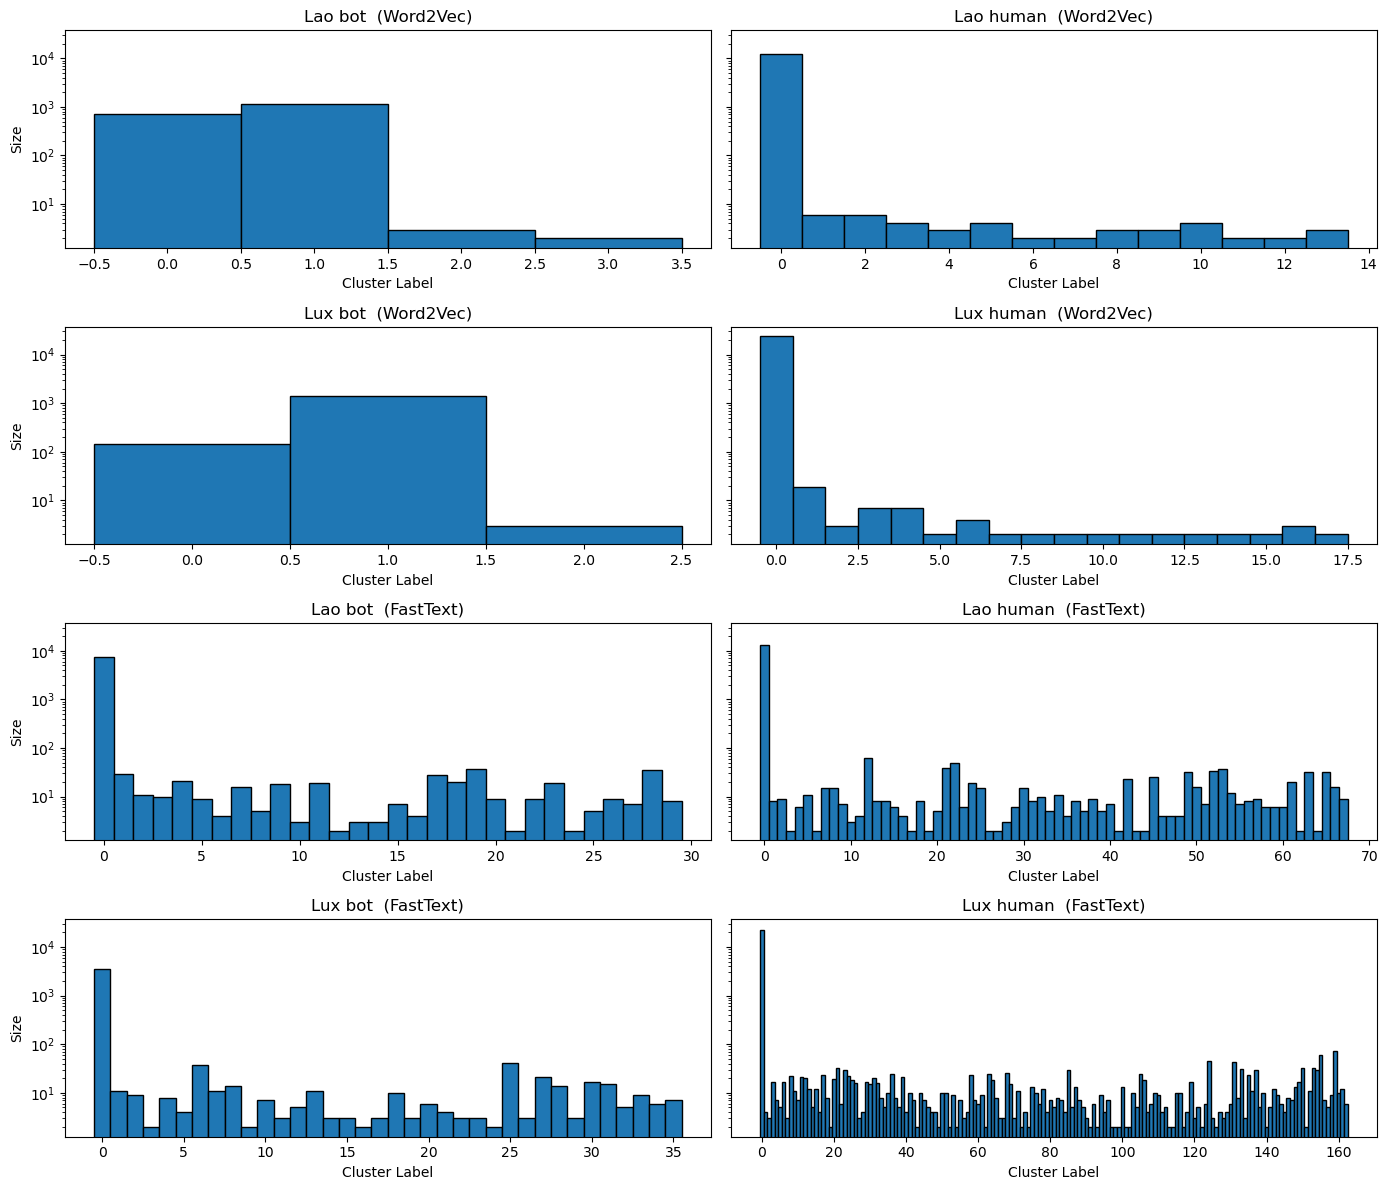

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Run Wishart on all 8 embeddings and stash them in a dict ---
labels_dict = {}
for cfg in configs:
    X      = np.load(f"{cfg['fn']}.npy")
    labels = Wishart(30, 0.05).fit(X)
    # key must exactly match cfg['lang'] and cfg['type']
    labels_dict[(cfg['model'], cfg['lang'], cfg['type'])] = labels

# --- 2) Now define your 8 panels in reading order ---
# NOTE: use the exact same strings for lang/type as in configs!
plot_order = [
    ('Word2Vec', 'Lao', 'bot'),
    ('Word2Vec', 'Lao', 'human'),
    ('Word2Vec', 'Lux', 'bot'),
    ('Word2Vec', 'Lux', 'human'),
    ('FastText', 'Lao', 'bot'),
    ('FastText', 'Lao', 'human'),
    ('FastText', 'Lux', 'bot'),
    ('FastText', 'Lux', 'human'),
]

# --- 3) Build a 4×2 grid of log-y histograms, integer-aligned bins ---
fig, axes = plt.subplots(4, 2, figsize=(14, 12), sharey=True)

for idx, (model, lang, typ) in enumerate(plot_order):
    row, col = divmod(idx, 2)
    ax        = axes[row, col]
    lbls      = labels_dict[(model, lang, typ)]
    # one bin per integer label, centered on the integer
    bins = np.arange(lbls.max() + 2) - 0.5

    ax.hist(lbls, bins=bins, edgecolor='black')
    ax.set_yscale('log')
    ax.set_xlabel("Cluster Label")
    if col == 0:
        ax.set_ylabel("Size")

    # Title like "Lao bot (Word2Vec)"
    ax.set_title(f"{lang} {typ}  ({model})")

plt.tight_layout()
plt.show()


Lao Bot USE:   0%|          | 0/59 [00:00<?, ?it/s]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Lao Human USE:   0%|          | 0/59 [00:00<?, ?it/s]

Luxembourgish Bot USE:   0%|          | 0/59 [00:00<?, ?it/s]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Luxembourgish Human USE:   0%|          | 0/59 [00:00<?, ?it/s]

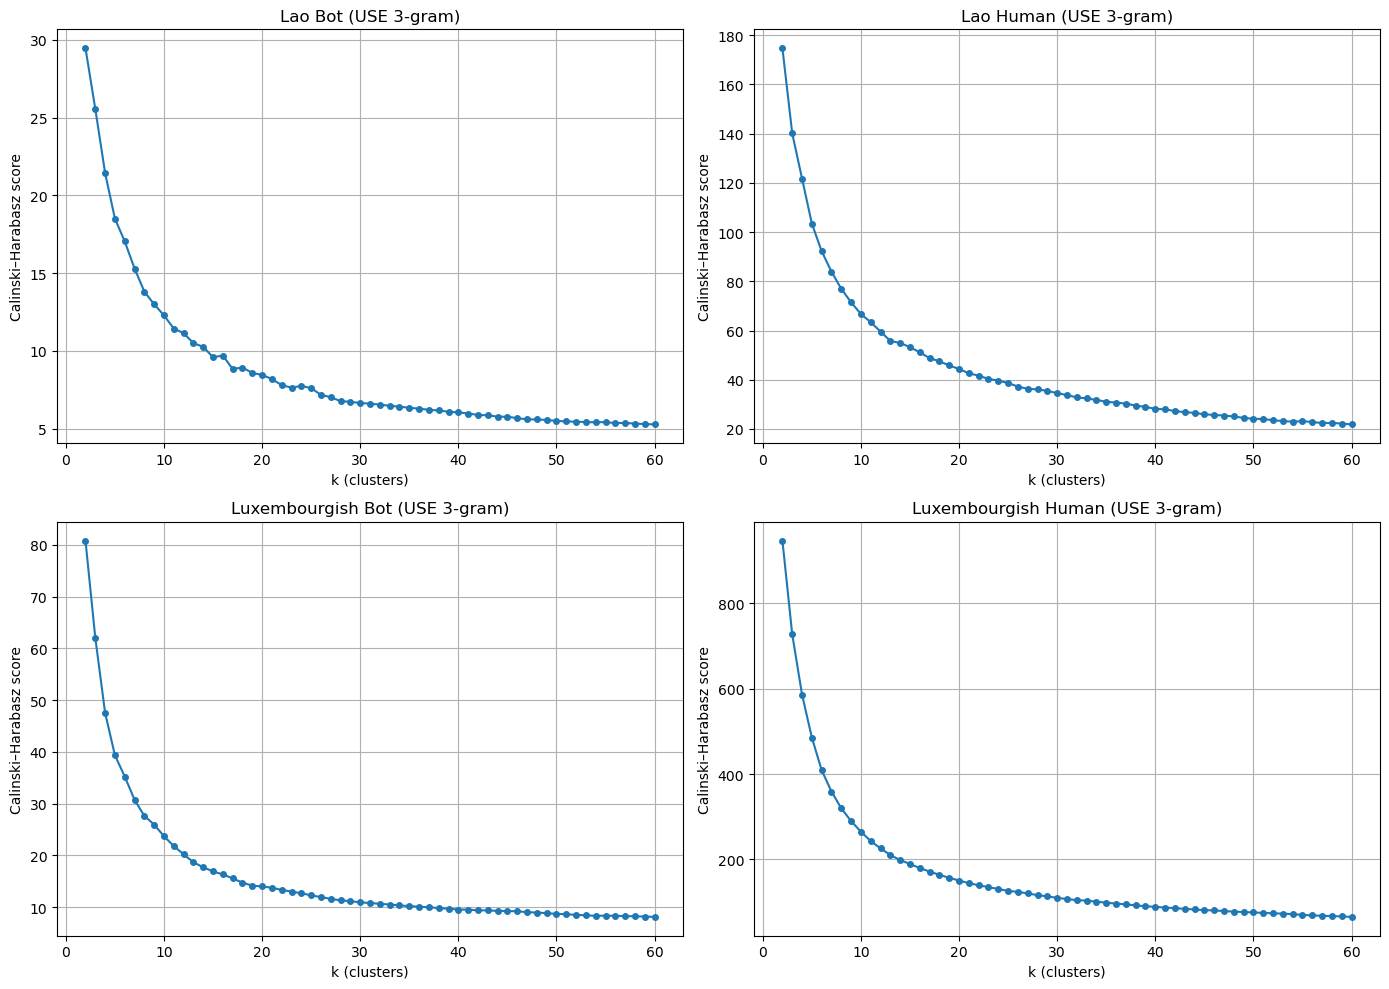

Best k for each dataset:
  Lao Bot USE                    → k = 2
  Lao Human USE                  → k = 2
  Luxembourgish Bot USE          → k = 2
  Luxembourgish Human USE        → k = 2


In [117]:
import numpy                as np
import matplotlib.pyplot    as plt
from sklearn.metrics        import calinski_harabasz_score
from sklearn.cluster        import KMeans
from tqdm.notebook          import tqdm

# ──────────────────────────────────────────────────────────────────────────────
# 1) Helper: build n-gram (here n=3) averaged vectors from raw embeddings
def make_ngrams(vectors: np.ndarray, n: int = 3) -> np.ndarray:
    """
    Given an array of shape (T, D), return an array of shape (T−n+1, D)
    where each row is the mean of a sliding n-window of the input.
    """
    out = []
    for i in range(len(vectors) - n + 1):
        window = vectors[i : i + n]
        out.append(window.mean(axis=0))
    return np.vstack(out)

# ──────────────────────────────────────────────────────────────────────────────
# 2) Load your four raw USE files (these must exist already)
raw_lao_bot   = np.load("lao_bot_use.npy")
raw_lao_human = np.load("lao_human_use.npy")
raw_lux_bot   = np.load("luxembourgish_bot_use.npy")
raw_lux_human = np.load("luxembourgish_human_use.npy")

# 3) Turn them into 3-gram averaged vectors
vecs = {
    "Lao Bot USE"             : make_ngrams(raw_lao_bot,   n=3),
    "Lao Human USE"           : make_ngrams(raw_lao_human, n=3),
    "Luxembourgish Bot USE"   : make_ngrams(raw_lux_bot,   n=3),
    "Luxembourgish Human USE" : make_ngrams(raw_lux_human, n=3),
}

languages = ["Lao", "Luxembourgish"]
types     = ["Bot", "Human"]

# ──────────────────────────────────────────────────────────────────────────────
# 4) Sweep k=2…60, compute CH score, plot 2×2
fig, axs = plt.subplots(2, 2, figsize=(14,10))
axs = axs.flatten()

best_k = []

for name, X in vecs.items():
    ks     = list(range(2,61))
    scores = []
    top_k  = None
    top_sc = -1

    for k in tqdm(ks, desc=name):
        km     = KMeans(n_clusters=k, random_state=0)
        labels = km.fit_predict(X)
        if len(np.unique(labels)) > 1:
            sc = calinski_harabasz_score(X, labels)
        else:
            sc = 0
        scores.append(sc)
        if sc > top_sc:
            top_sc, top_k = sc, k

    best_k.append(top_k or 0)

    # map name → subplot index
    if   name.startswith("Lao Bot"):        idx = 0
    elif name.startswith("Lao Human"):      idx = 1
    elif name.startswith("Luxembourgish Bot"):  idx = 2
    else:                                   idx = 3

    ax = axs[idx]
    ax.plot(ks, scores, "-o", markersize=4)
    lang = languages[idx//2]
    typ  = types[idx%2]
    ax.set_title(f"{lang} {typ} (USE 3-gram)")
    ax.set_xlabel("k (clusters)")
    ax.set_ylabel("Calinski–Harabasz score")
    ax.grid(True)

plt.tight_layout()
plt.show()

# ──────────────────────────────────────────────────────────────────────────────
# 5) Report winners
print("Best k for each dataset:")
for name, k in zip(vecs, best_k):
    print(f"  {name:30s} → k = {k}")


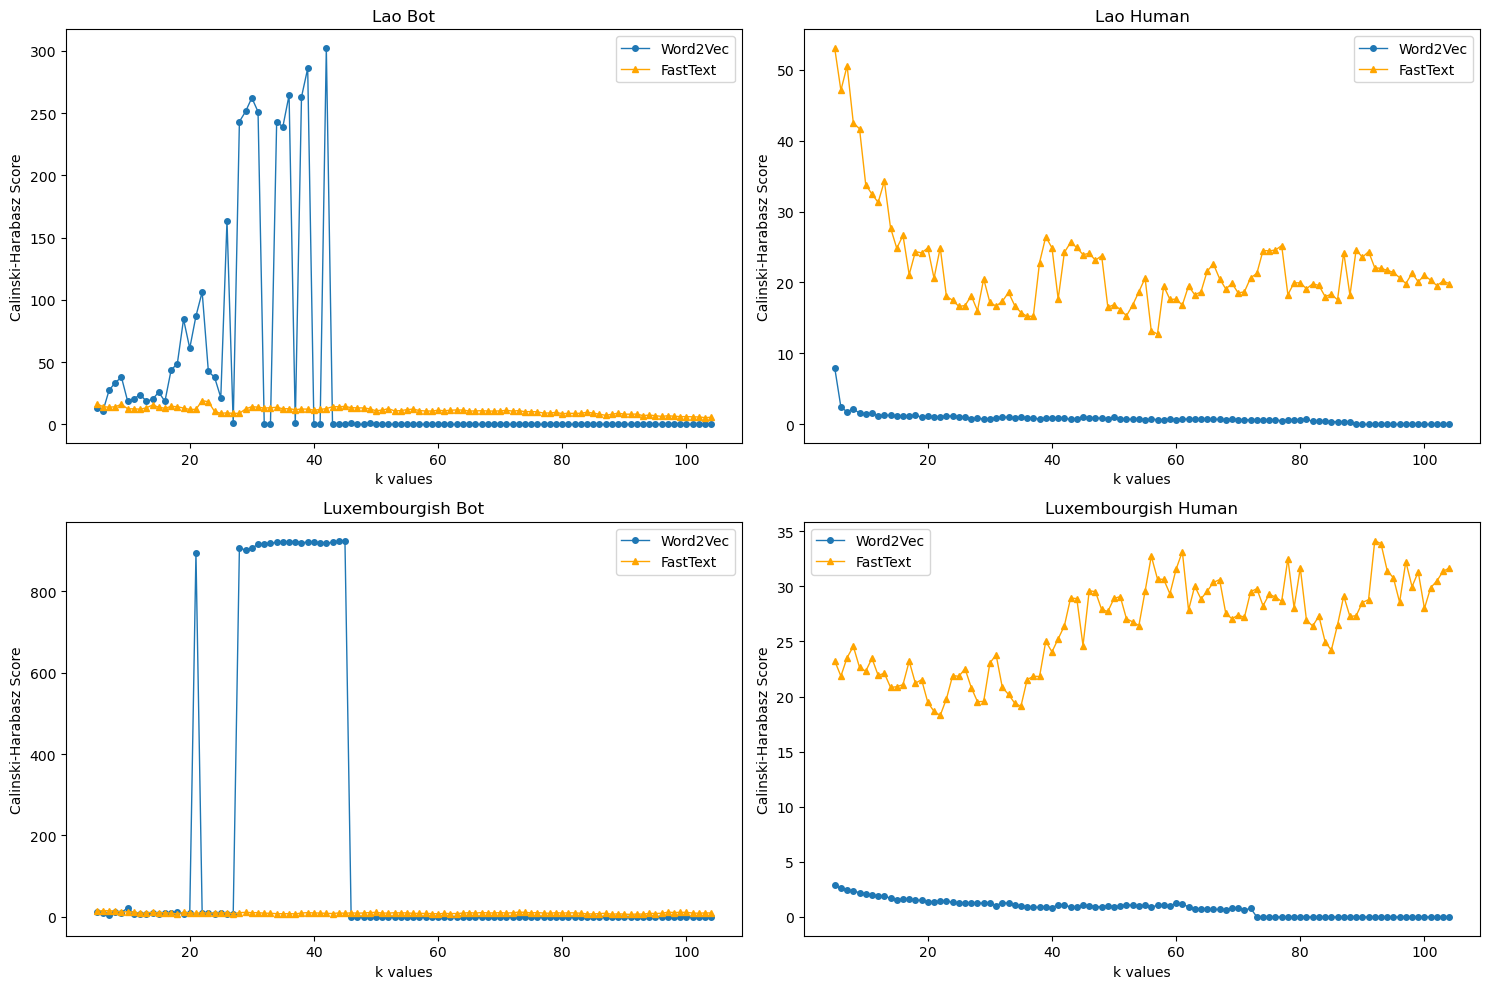


Best k values for each dataset:
Lao Bot Word2Vec: 42
Lao Human Word2Vec: 5
Luxembourgish Bot Word2Vec: 45
Luxembourgish Human Word2Vec: 5
Lao Bot FastText: 22
Lao Human FastText: 5
Luxembourgish Bot FastText: 6
Luxembourgish Human FastText: 92


In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from tqdm import tqdm
from joblib import Parallel, delayed

# Load embeddings (NO subsampling if data is <10,000)
vectors_lao_bot_w2v      = np.load("lao_bot_w2v.npy")
vectors_lao_human_w2v    = np.load("lao_human_w2v.npy")
vectors_lux_bot_w2v      = np.load("lux_bot_w2v.npy")
vectors_lux_human_w2v    = np.load("lux_human_w2v.npy")
vectors_lao_bot_ft       = np.load("lao_bot_ft.npy")
vectors_lao_human_ft     = np.load("lao_human_ft.npy")
vectors_lux_bot_ft       = np.load("lux_bot_ft.npy")
vectors_lux_human_ft     = np.load("lux_human_ft.npy")

languages = ['Lao', 'Luxembourgish']
types = ['Bot', 'Human']

datasets = {
    'Lao Bot Word2Vec': vectors_lao_bot_w2v,
    'Lao Human Word2Vec': vectors_lao_human_w2v,
    'Luxembourgish Bot Word2Vec': vectors_lux_bot_w2v,
    'Luxembourgish Human Word2Vec': vectors_lux_human_w2v,
    'Lao Bot FastText': vectors_lao_bot_ft,
    'Lao Human FastText': vectors_lao_human_ft,
    'Luxembourgish Bot FastText': vectors_lux_bot_ft,
    'Luxembourgish Human FastText': vectors_lux_human_ft
}

# Dense k-range (for smooth lines)
k_ranges = {key: range(5, 105) for key in datasets.keys()}

def compute_ch_scores(lang_type, vectors, k_range):
    ch_scores = []
    best_k = 0
    max_score = 0
    for k in tqdm(k_range, desc=f"Processing {lang_type}"):
        wishart = Wishart(wishart_neighbors=k, significance_level=15)
        labels = wishart.fit(vectors)
        if len(np.unique(labels)) > 1:
            score = calinski_harabasz_score(vectors, labels)
            ch_scores.append(score)
            if score > max_score:
                max_score = score
                best_k = k
        else:
            ch_scores.append(0)
    return lang_type, ch_scores, best_k

results = Parallel(n_jobs=-1)(
    delayed(compute_ch_scores)(name, vecs, k_ranges[name])
    for name, vecs in datasets.items()
)

plot_data = {}
best_ks = {}
for res in results:
    name, scores, best_k = res
    plot_data[name] = scores
    best_ks[name] = best_k

# ---- Visualization: 2×2 grid ----
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for idx, lang in enumerate(languages):
    for j, typ in enumerate(types):
        ax = axs[2*idx + j]
        # Word2Vec curve
        ax.plot(list(k_ranges[f"{lang} {typ} Word2Vec"]), 
                plot_data[f"{lang} {typ} Word2Vec"], 
                label='Word2Vec', marker='o', markersize=4, linewidth=1)
        # FastText curve
        ax.plot(list(k_ranges[f"{lang} {typ} FastText"]), 
                plot_data[f"{lang} {typ} FastText"], 
                label='FastText', marker='^', color='orange', markersize=4, linewidth=1)
        ax.set_title(f"{lang} {typ}")
        ax.set_xlabel('k values')
        ax.set_ylabel('Calinski-Harabasz Score')
        ax.legend()

plt.tight_layout()
plt.show()

print("\nBest k values for each dataset:")
for name, k in best_ks.items():
    print(f"{name}: {k}")


Wishart:   0%|                                                                                 | 0/647 [00:00<?, ?it/s]C:\Users\Taqi\AppData\Local\Temp\ipykernel_3012\3414384783.py:81: RuntimeWarning: overflow encountered in power
  np.power(np.maximum(sub[:,0], 1e-10), -dim)
C:\Users\Taqi\AppData\Local\Temp\ipykernel_3012\3414384783.py:82: RuntimeWarning: overflow encountered in power
  - np.power(np.maximum(sub[:,1], 1e-10), -dim)
Wishart:   0%|                                                                                 | 0/647 [00:00<?, ?it/s]C:\Users\Taqi\AppData\Local\Temp\ipykernel_3012\3414384783.py:81: RuntimeWarning: overflow encountered in power
  np.power(np.maximum(sub[:,0], 1e-10), -dim)
C:\Users\Taqi\AppData\Local\Temp\ipykernel_3012\3414384783.py:82: RuntimeWarning: overflow encountered in power
  - np.power(np.maximum(sub[:,1], 1e-10), -dim)
Wishart:   0%|                                                                                 | 0/647 [00:00<?, ?it/s]C:\User

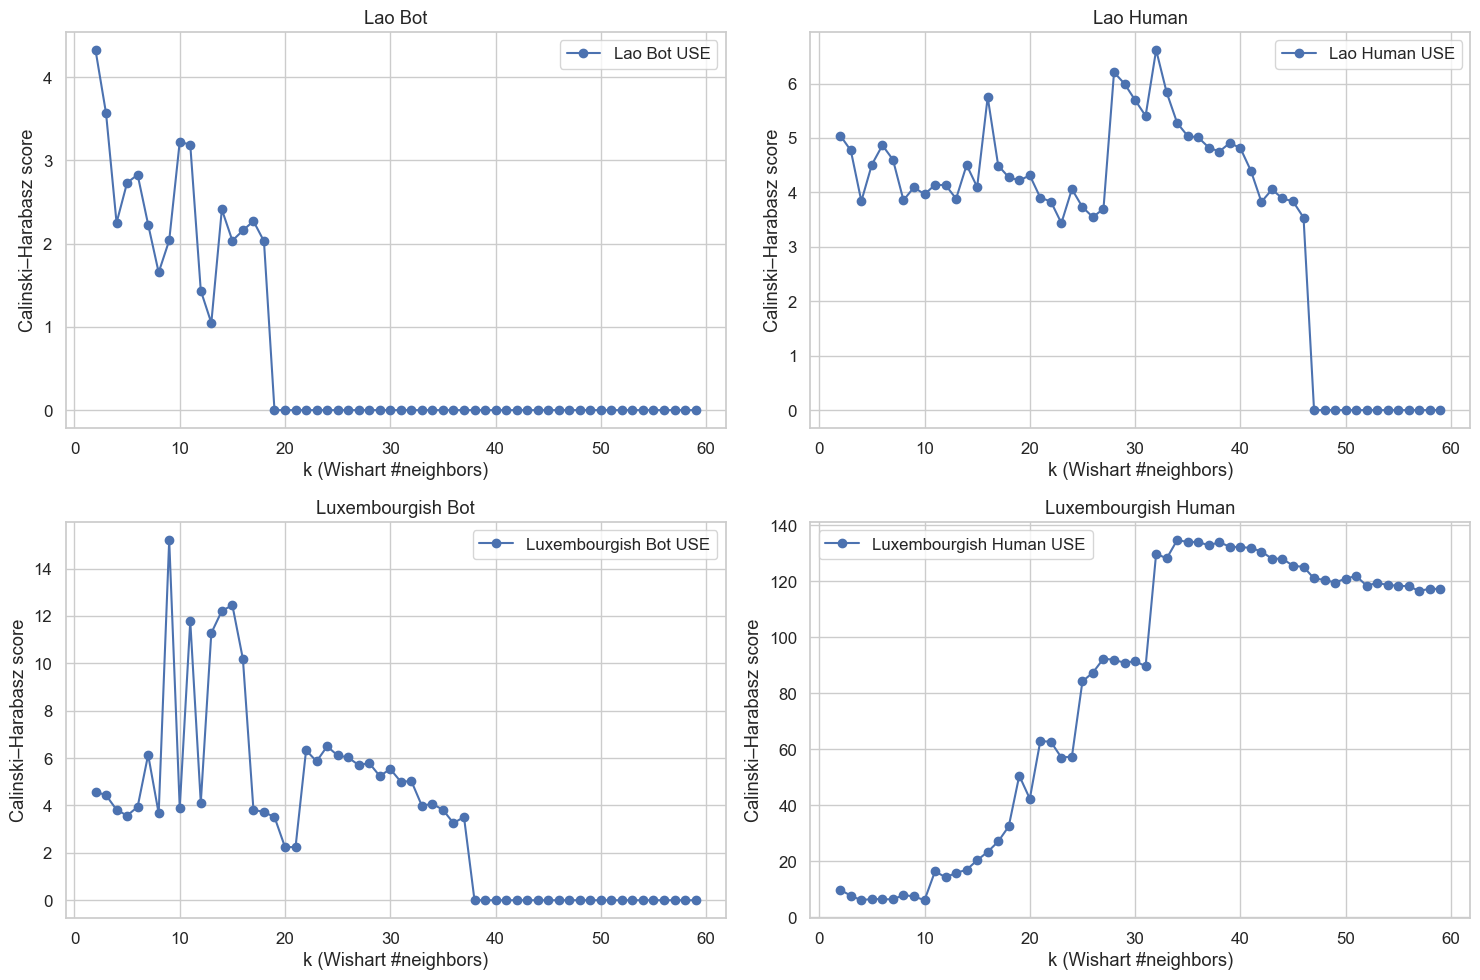

Best k values for each dataset:
  Lao Bot USE: 2
  Lao Human USE: 32
  Luxembourgish Bot USE: 9
  Luxembourgish Human USE: 34


In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from tqdm import tqdm

# 1) Languages & types for titles/labels
languages = ['Lao', 'Luxembourgish']
types     = ['Bot', 'Human']

# 2) Point at the four USE‐3gram arrays you already have in memory
datasets = {
    'Lao Bot USE':               vecs_lao_bot,
    'Lao Human USE':             vecs_lao_human,
    'Luxembourgish Bot USE':     vecs_lux_bot,
    'Luxembourgish Human USE':   vecs_lux_human
}

# 3) Run Wishart sweep (k=2…59), compute CH‐score
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()
best_k_values = []

for lang_type, X in datasets.items():
    k_range      = range(2, 60)
    ch_scores    = []
    max_ch_score = 0.0
    best_k       = 0

    for k in tqdm(k_range, desc=f"Processing {lang_type}"):
        # keep your Wishart settings the same
        wishart = Wishart(wishart_neighbors=k, significance_level=0.05)
        labels  = wishart.fit(X)

        if np.unique(labels).size > 1:
            score = calinski_harabasz_score(X, labels)
        else:
            score = 0.0

        ch_scores.append(score)
        if score > max_ch_score:
            max_ch_score = score
            best_k       = k

    best_k_values.append(best_k)

    # pick subplot: Lao → 0/1, Luxembourgish → 2/3
    if 'Lao' in lang_type:
        idx = 0 if 'Bot' in lang_type else 1
    else:
        idx = 2 if 'Bot' in lang_type else 3

    ax = axs[idx]
    ax.plot(k_range, ch_scores, marker='o', linestyle='-', label=lang_type)
    ax.set_title(f"{languages[idx//2]} {types[idx%2]}")
    ax.set_xlabel("k (Wishart #neighbors)")
    ax.set_ylabel("Calinski–Harabasz score")
    ax.legend()

plt.tight_layout()
plt.show()

# 4) Print out your best‐k for each panel
print("Best k values for each dataset:")
for name, k in zip(datasets.keys(), best_k_values):
    print(f"  {name}: {k}")


Wishart: 100%|██████████████████████████████████████████████████████████████████| 6340/6340 [00:00<00:00, 15935.24it/s]


       Model       Language Type  Vocabulary (n-grams)  Clusters  \
0   Word2Vec            Lao  w2v                  1878         8   
1   Word2Vec            Lao  w2v                 12094        32   
2   Word2Vec  Luxembourgish  w2v                  1585         5   
3   Word2Vec  Luxembourgish  w2v                 23592        60   
4   FastText            Lao   ft                  7728        35   
5   FastText            Lao   ft                 13718        71   
6   FastText  Luxembourgish   ft                  3870        37   
7   FastText  Luxembourgish   ft                 24283       170   
8        USE            Lao  use                   649         1   
9        USE            Lao  use                  4209         5   
10       USE  Luxembourgish  use                   402         3   
11       USE  Luxembourgish  use                  6340         4   

    Calinski–Harabasz  Silhouette  Davies–Bouldin  
0            9.526316   -0.564846        1.382132  
1          

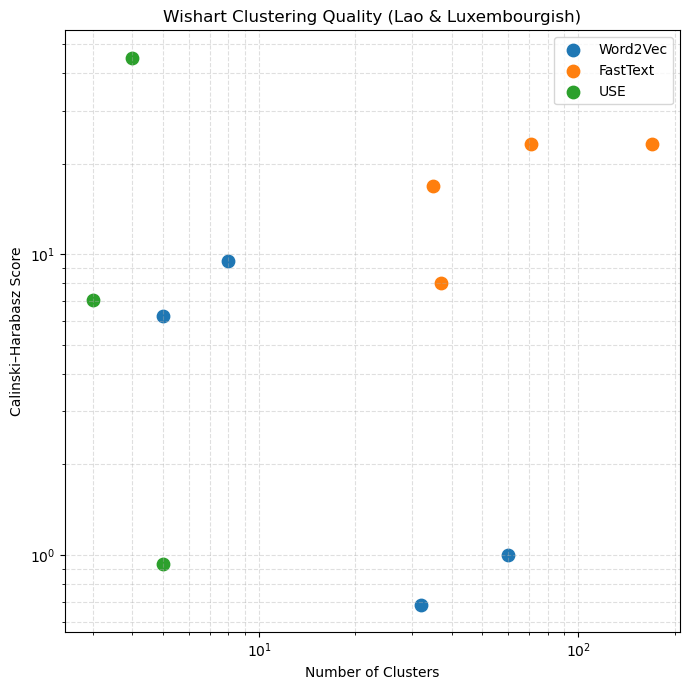

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import (
    calinski_harabasz_score,
    silhouette_score,
    davies_bouldin_score,
)
from scipy.special import gamma
from sklearn.neighbors import KDTree
from tqdm import tqdm

# ————— Wishart clustering (from taqi2thesis) —————
class Wishart:
    def __init__(self, wishart_neighbors=30, significance_level=0.05):
        self.wishart_neighbors = wishart_neighbors
        self.significance_level = significance_level

    def fit(self, X):
        n, dim = X.shape
        kdt = KDTree(X, metric='euclidean')
        dists, nbrs = kdt.query(X, k=self.wishart_neighbors+1)
        nbrs = nbrs[:,1:]
        radii = dists[:,-1]
        order = np.argsort(radii)

        labels = -np.ones(n, int)
        clusters = np.array([(1.0,1.0,0.0)])
        members = defaultdict(list)

        for i in tqdm(order, desc="Wishart"):
            neigh_lbls = labels[nbrs[i]]
            uc = np.unique(neigh_lbls[neigh_lbls>=0]).astype(int)

            if uc.size == 0:
                # new cluster
                L = len(clusters)
                labels[i] = L
                members[L].append(i)
                clusters = np.vstack([clusters, (radii[i], radii[i], 0.0)])

            else:
                lo, hi = uc[0], uc[-1]
                if lo == hi:
                    # single existing cluster
                    if clusters[lo,-1] < 0.5:
                        labels[i] = lo
                        members[lo].append(i)
                        clusters[lo,0] = min(clusters[lo,0], radii[i])
                        clusters[lo,1] = max(clusters[lo,1], radii[i])
                    else:
                        # marked noise → cluster 0
                        labels[i] = 0
                        members[0].append(i)
                else:
                    # multiple neighboring clusters → test significance
                    sub = clusters[uc]
                    with np.errstate(divide='ignore', invalid='ignore'):
                        sig = (
                            np.power(np.maximum(sub[:,0],1e-10), -dim)
                            - np.power(np.maximum(sub[:,1],1e-10), -dim)
                        )
                        sig *= (self.wishart_neighbors / (n * np.pi**(dim/2)) * gamma(dim/2+1))
                    mask = sig >= self.significance_level
                    sc = uc[mask]
                    nsc = uc[~mask]

                    if sc.size > 1 or lo == 0:
                        # too many significant merges → noise
                        labels[i] = 0
                        members[0].append(i)
                    else:
                        # absorb into the lowest non‐significant cluster
                        keep = sc[0] if sc.size==1 else lo
                        for c in uc:
                            if c!= keep:
                                for j in members[c]:
                                    labels[j] = keep
                                    members[keep].append(j)
                                members[c].clear()
                        labels[i] = keep
                        members[keep].append(i)
                        clusters[keep,0] = min(clusters[keep,0], radii[i])
                        clusters[keep,1] = max(clusters[keep,1], radii[i])
                        clusters[keep,-1] = 1.0  # mark as “settled”

        # relabel to 0…K–1
        uniq = np.unique(labels)
        mapping = {old:new for new,old in enumerate(uniq)}
        return np.array([mapping[l] for l in labels], int)

# ————— configuration for your 8 .npy files —————
configs = [
    dict(model='Word2Vec', lang='Lao',       fn='lao_bot_w2v',           ngram_file='lao_bot_w2v.npy'),
    dict(model='Word2Vec', lang='Lao',       fn='lao_human_w2v',         ngram_file='lao_human_w2v.npy'),
    dict(model='Word2Vec', lang='Luxembourgish', fn='lux_bot_w2v',       ngram_file='lux_bot_w2v.npy'),
    dict(model='Word2Vec', lang='Luxembourgish', fn='lux_human_w2v',     ngram_file='lux_human_w2v.npy'),
    dict(model='FastText', lang='Lao',       fn='lao_bot_ft',            ngram_file='lao_bot_ft.npy'),
    dict(model='FastText', lang='Lao',       fn='lao_human_ft',          ngram_file='lao_human_ft.npy'),
    dict(model='FastText', lang='Luxembourgish', fn='lux_bot_ft',        ngram_file='lux_bot_ft.npy'),
    dict(model='FastText', lang='Luxembourgish', fn='lux_human_ft',      ngram_file='lux_human_ft.npy'),
    dict(model='USE',     lang='Lao',       fn='lao_bot_use',           ngram_file='lao_bot_use.npy'),
    dict(model='USE',     lang='Lao',       fn='lao_human_use',         ngram_file='lao_human_use.npy'),
    dict(model='USE',     lang='Luxembourgish', fn='lux_bot_use',       ngram_file='luxembourgish_bot_use.npy'),
    dict(model='USE',     lang='Luxembourgish', fn='lux_human_use',     ngram_file='luxembourgish_human_use.npy'),
]

# ————— run Wishart + compute cluster‐quality metrics —————
results = []
for cfg in configs:
    X = np.load(cfg['ngram_file'])
    labels = Wishart(wishart_neighbors=30, significance_level=0.05).fit(X)
    n_clusters = len(np.unique(labels))
    if n_clusters > 1:
        ch  = calinski_harabasz_score(X, labels)
        sil = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
    else:
        ch = sil = dbi = np.nan
    results.append({
        'Model': cfg['model'],
        'Language': cfg['lang'],
        'Type': cfg['fn'].split('_')[2],   # bot vs human
        'Vocabulary (n-grams)': X.shape[0],
        'Clusters': n_clusters,
        'Calinski–Harabasz': ch,
        'Silhouette': sil,
        'Davies–Bouldin': dbi
    })

df = pd.DataFrame(results)
print(df)

# ————— scatter Calinski–Harabasz vs Clusters (log–log) —————
plt.figure(figsize=(7,7))
for m in df['Model'].unique():
    sub = df[df['Model']==m]
    plt.scatter(sub['Clusters'], sub['Calinski–Harabasz'], label=m, s=80)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski–Harabasz Score')
plt.title('Wishart Clustering Quality (Lao & Luxembourgish)')
plt.legend()
plt.grid(which='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## tSNE implementatiion

Wishart: 100%|██████████████████████████████████████████████████████████████████| 1865/1865 [00:00<00:00, 19387.75it/s]
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
Wishart: 100%|████████████████████████████████████████████████████████████████| 50272/50272 [00:01<00:00, 30132.70it/s]
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
Wishart: 100%|██████████████████████████████████████████████████████████████████| 3727/3727 [00:00<00:00, 23418.70it/s]
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
Wishart: 100%|██████████████████████████████████████████████████████████████| 1174

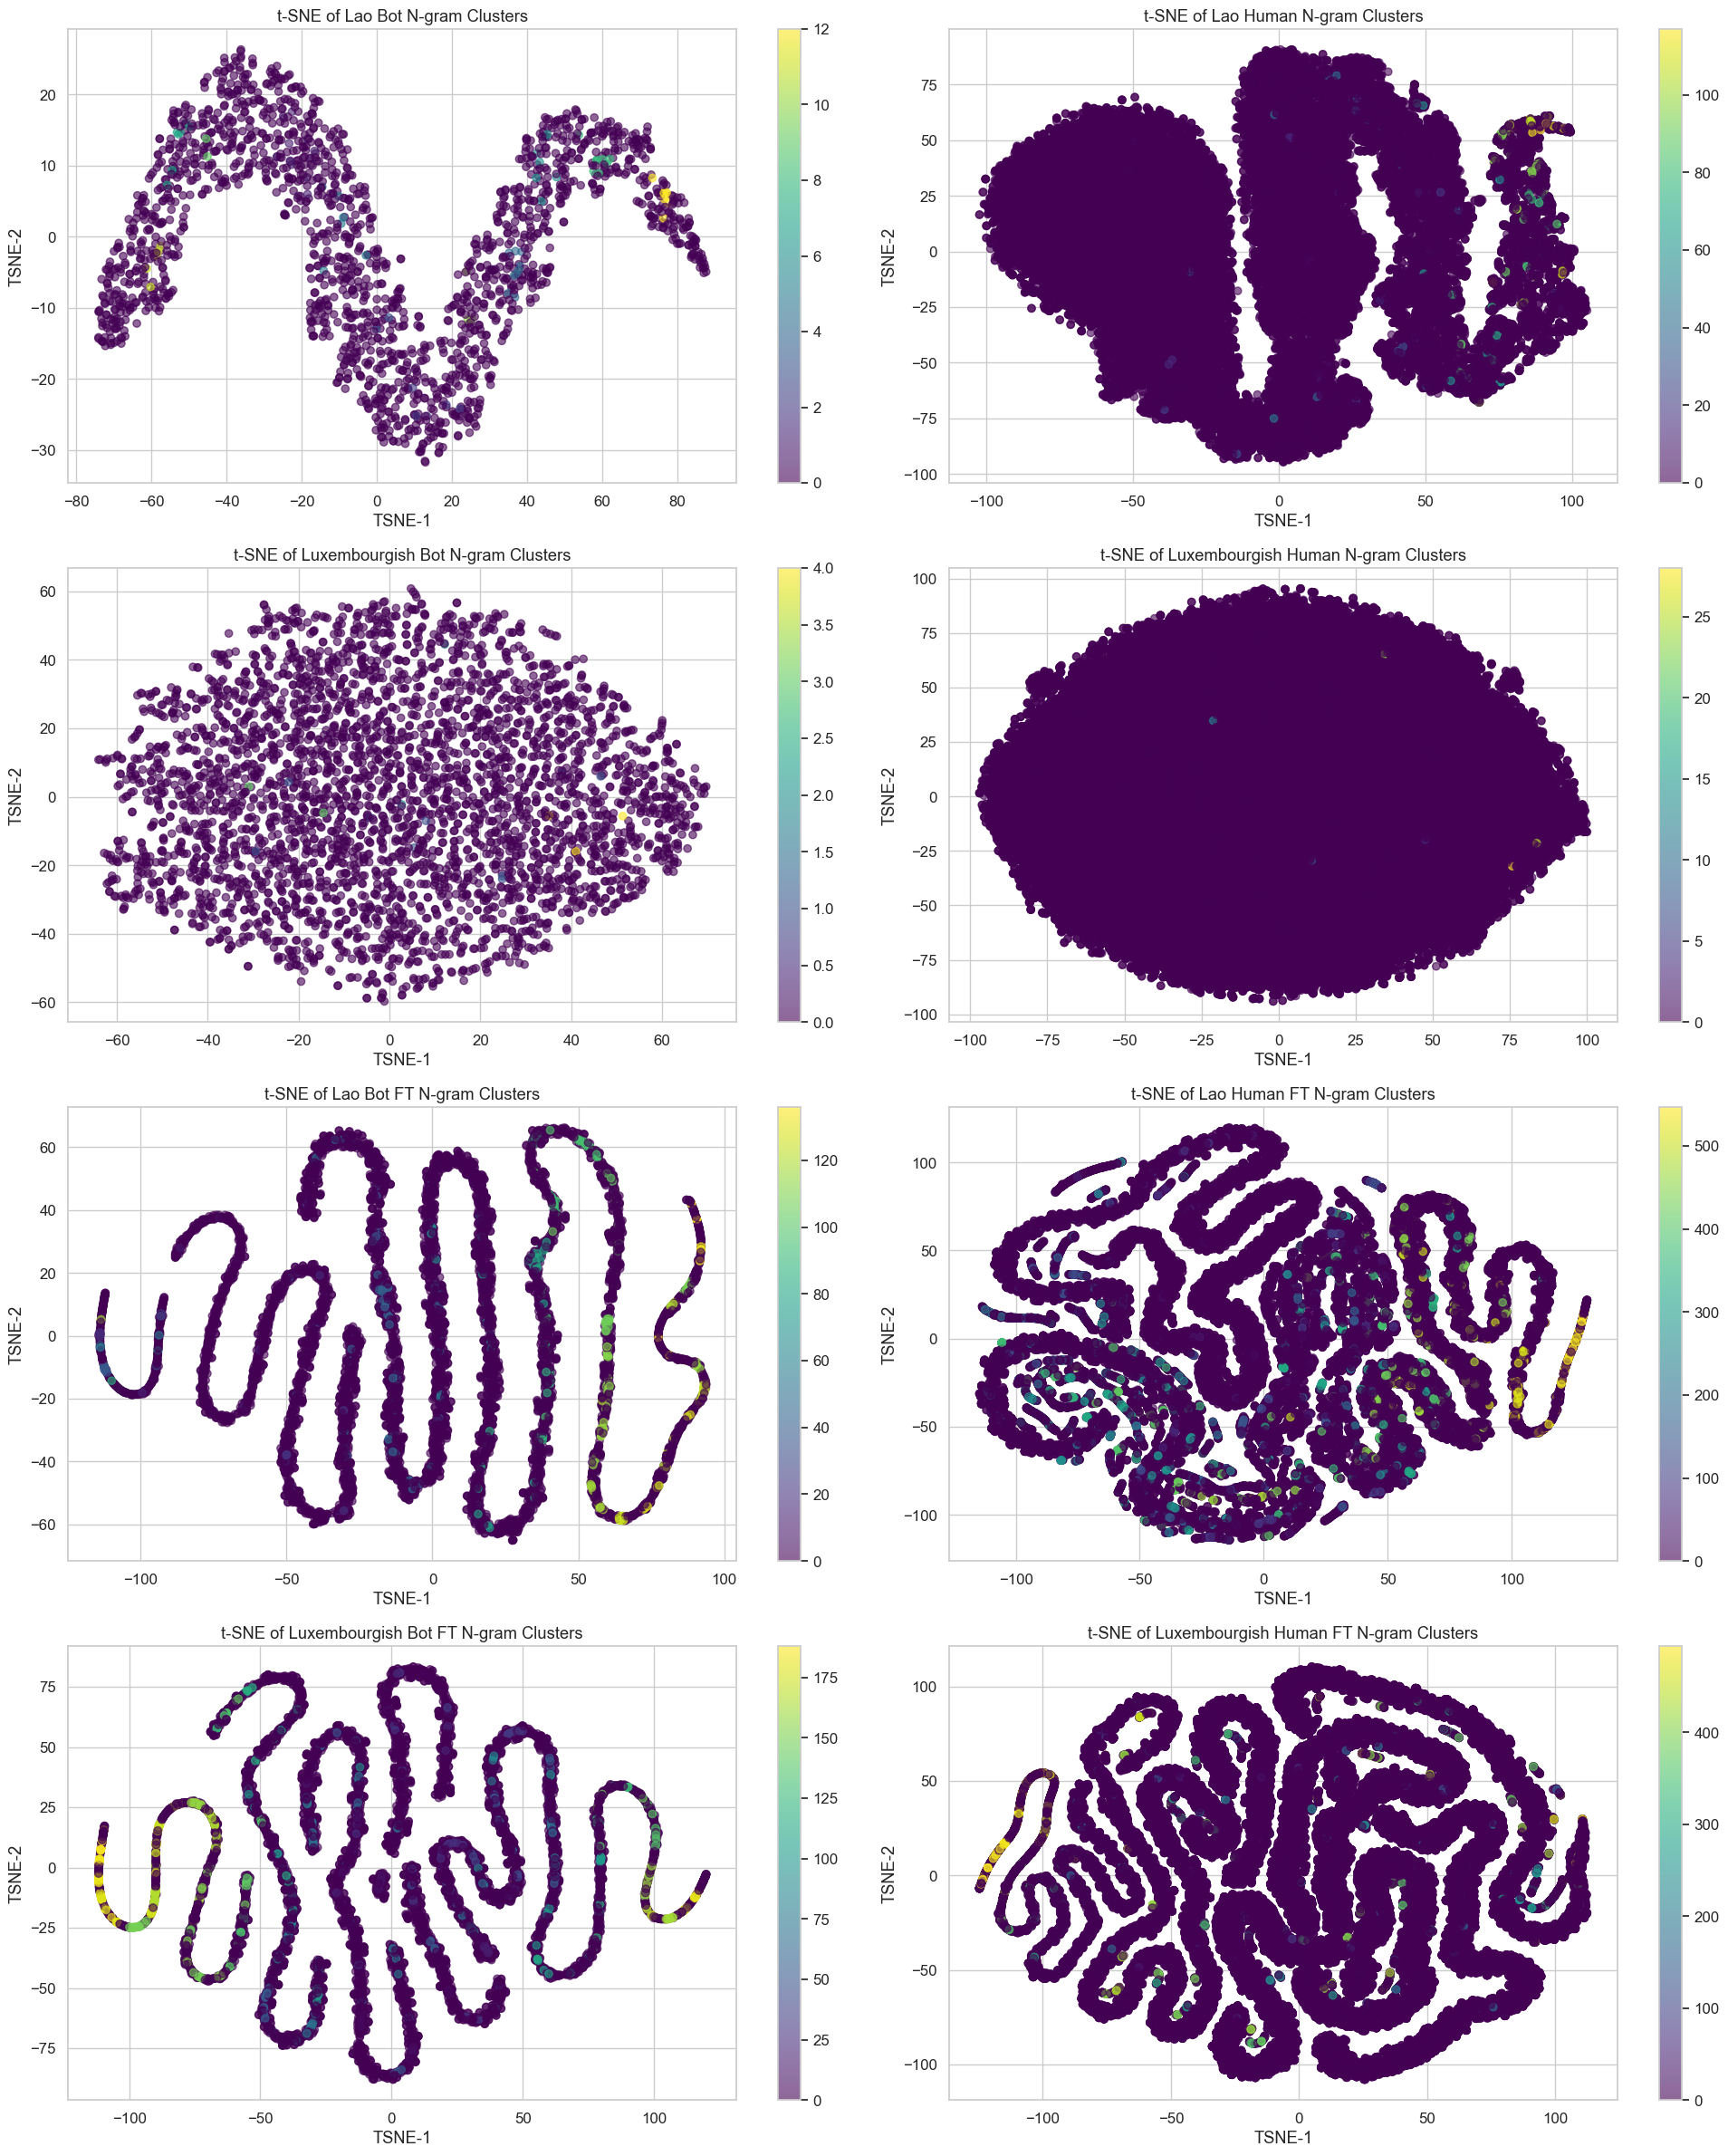

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
from tqdm import tqdm

# --- n-gram generator (simple sliding window) ---
def generate_ngrams(tokens, n=3):
    return [tokens[i:i+n] for i in range(len(tokens) - n + 1)]

# --- build n-gram datasets, skipping any n-gram with OOV tokens ---
def create_ngram_dataset(texts, model, n=3):
    seen = set()
    ngrams = []
    vectors = []
    for tokens in texts:
        for ng in generate_ngrams(tokens, n):
            tpl = tuple(ng)
            if tpl in seen:
                continue
            # skip if any token not in the model vocabulary
            if any(w not in model.wv.key_to_index for w in ng):
                continue
            seen.add(tpl)
            ngrams.append(' '.join(ng))
            emb = np.stack([model.wv[w] for w in ng])
            vectors.append(emb.mean(axis=0))
    return ngrams, np.array(vectors)

# --- representative n-gram finder ---
def find_representative_ngrams(ngrams, vectors, labels):
    if np.any(labels >= len(vectors)):
        raise ValueError("Label index exceeds vector bounds")
    reps = {}
    for lbl in np.unique(labels):
        idxs = np.where(labels == lbl)[0]
        if idxs.size == 0:
            continue
        cluster = vectors[idxs]
        center = cluster.mean(axis=0)
        dists = euclidean_distances(cluster, [center]).ravel()
        reps[lbl] = ngrams[idxs[np.argmin(dists)]]
    return reps

# --- load or define your pre-trained models here ---
# word2vec_corpus_lao, word2vec_corpus_luxembourgish, fasttext_corpus_lao, fasttext_corpus_luxembourgish

# --- create the eight datasets ---
ngrams_lao_bot,      vectors_lao_bot      = create_ngram_dataset([processed_texts_lao_bot],      word2vec_corpus_lao)
ngrams_lao_human,    vectors_lao_human    = create_ngram_dataset([processed_texts_lao_human],    word2vec_corpus_lao)
ngrams_lux_bot,      vectors_lux_bot      = create_ngram_dataset([processed_texts_lux_bot],      word2vec_corpus_luxembourgish)
ngrams_lux_human,    vectors_lux_human    = create_ngram_dataset([processed_texts_lux_human],    word2vec_corpus_luxembourgish)

ngrams_lao_bot_ft,   vectors_lao_bot_ft   = create_ngram_dataset([processed_texts_lao_bot],      fasttext_corpus_lao)
ngrams_lao_human_ft, vectors_lao_human_ft = create_ngram_dataset([processed_texts_lao_human],    fasttext_corpus_lao)
ngrams_lux_bot_ft,   vectors_lux_bot_ft   = create_ngram_dataset([processed_texts_lux_bot],      fasttext_corpus_luxembourgish)
ngrams_lux_human_ft, vectors_lux_human_ft = create_ngram_dataset([processed_texts_lux_human],    fasttext_corpus_luxembourgish)

# --- prepare for plotting ---
all_ngrams = [
    ngrams_lao_bot,   ngrams_lao_human,
    ngrams_lux_bot,   ngrams_lux_human,
    ngrams_lao_bot_ft, ngrams_lao_human_ft,
    ngrams_lux_bot_ft, ngrams_lux_human_ft
]
all_vecs = [
    vectors_lao_bot,   vectors_lao_human,
    vectors_lux_bot,   vectors_lux_human,
    vectors_lao_bot_ft, vectors_lao_human_ft,
    vectors_lux_bot_ft, vectors_lux_human_ft
]
titles = [
    "Lao Bot", "Lao Human",
    "Luxembourgish Bot", "Luxembourgish Human",
    "Lao Bot FT", "Lao Human FT",
    "Luxembourgish Bot FT", "Luxembourgish Human FT"
]

plt.figure(figsize=(20, 24))
for i, (ngrams, vecs, title) in enumerate(zip(all_ngrams, all_vecs, titles), start=1):
    plt.subplot(4, 2, i)
    
    # cluster with Wishart
    labels = Wishart(wishart_neighbors=15, significance_level=0.05).fit(vecs)
    
    # find representative n-grams
    rep_ngrams = find_representative_ngrams(ngrams, vecs, labels)
    
    # t-SNE projection
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
    coords = tsne.fit_transform(vecs)
    
    # scatter plot
    sc = plt.scatter(coords[:,0], coords[:,1], c=labels, cmap='viridis', alpha=0.6)
    plt.colorbar(sc)
    plt.title(f"t-SNE of {title} N-gram Clusters")
    plt.xlabel("TSNE-1")
    plt.ylabel("TSNE-2")

plt.tight_layout()
plt.show()


## PCA implementation

Wishart: 100%|██████████████████████████████████████████████████████████████| 117475/117475 [00:05<00:00, 20552.16it/s]


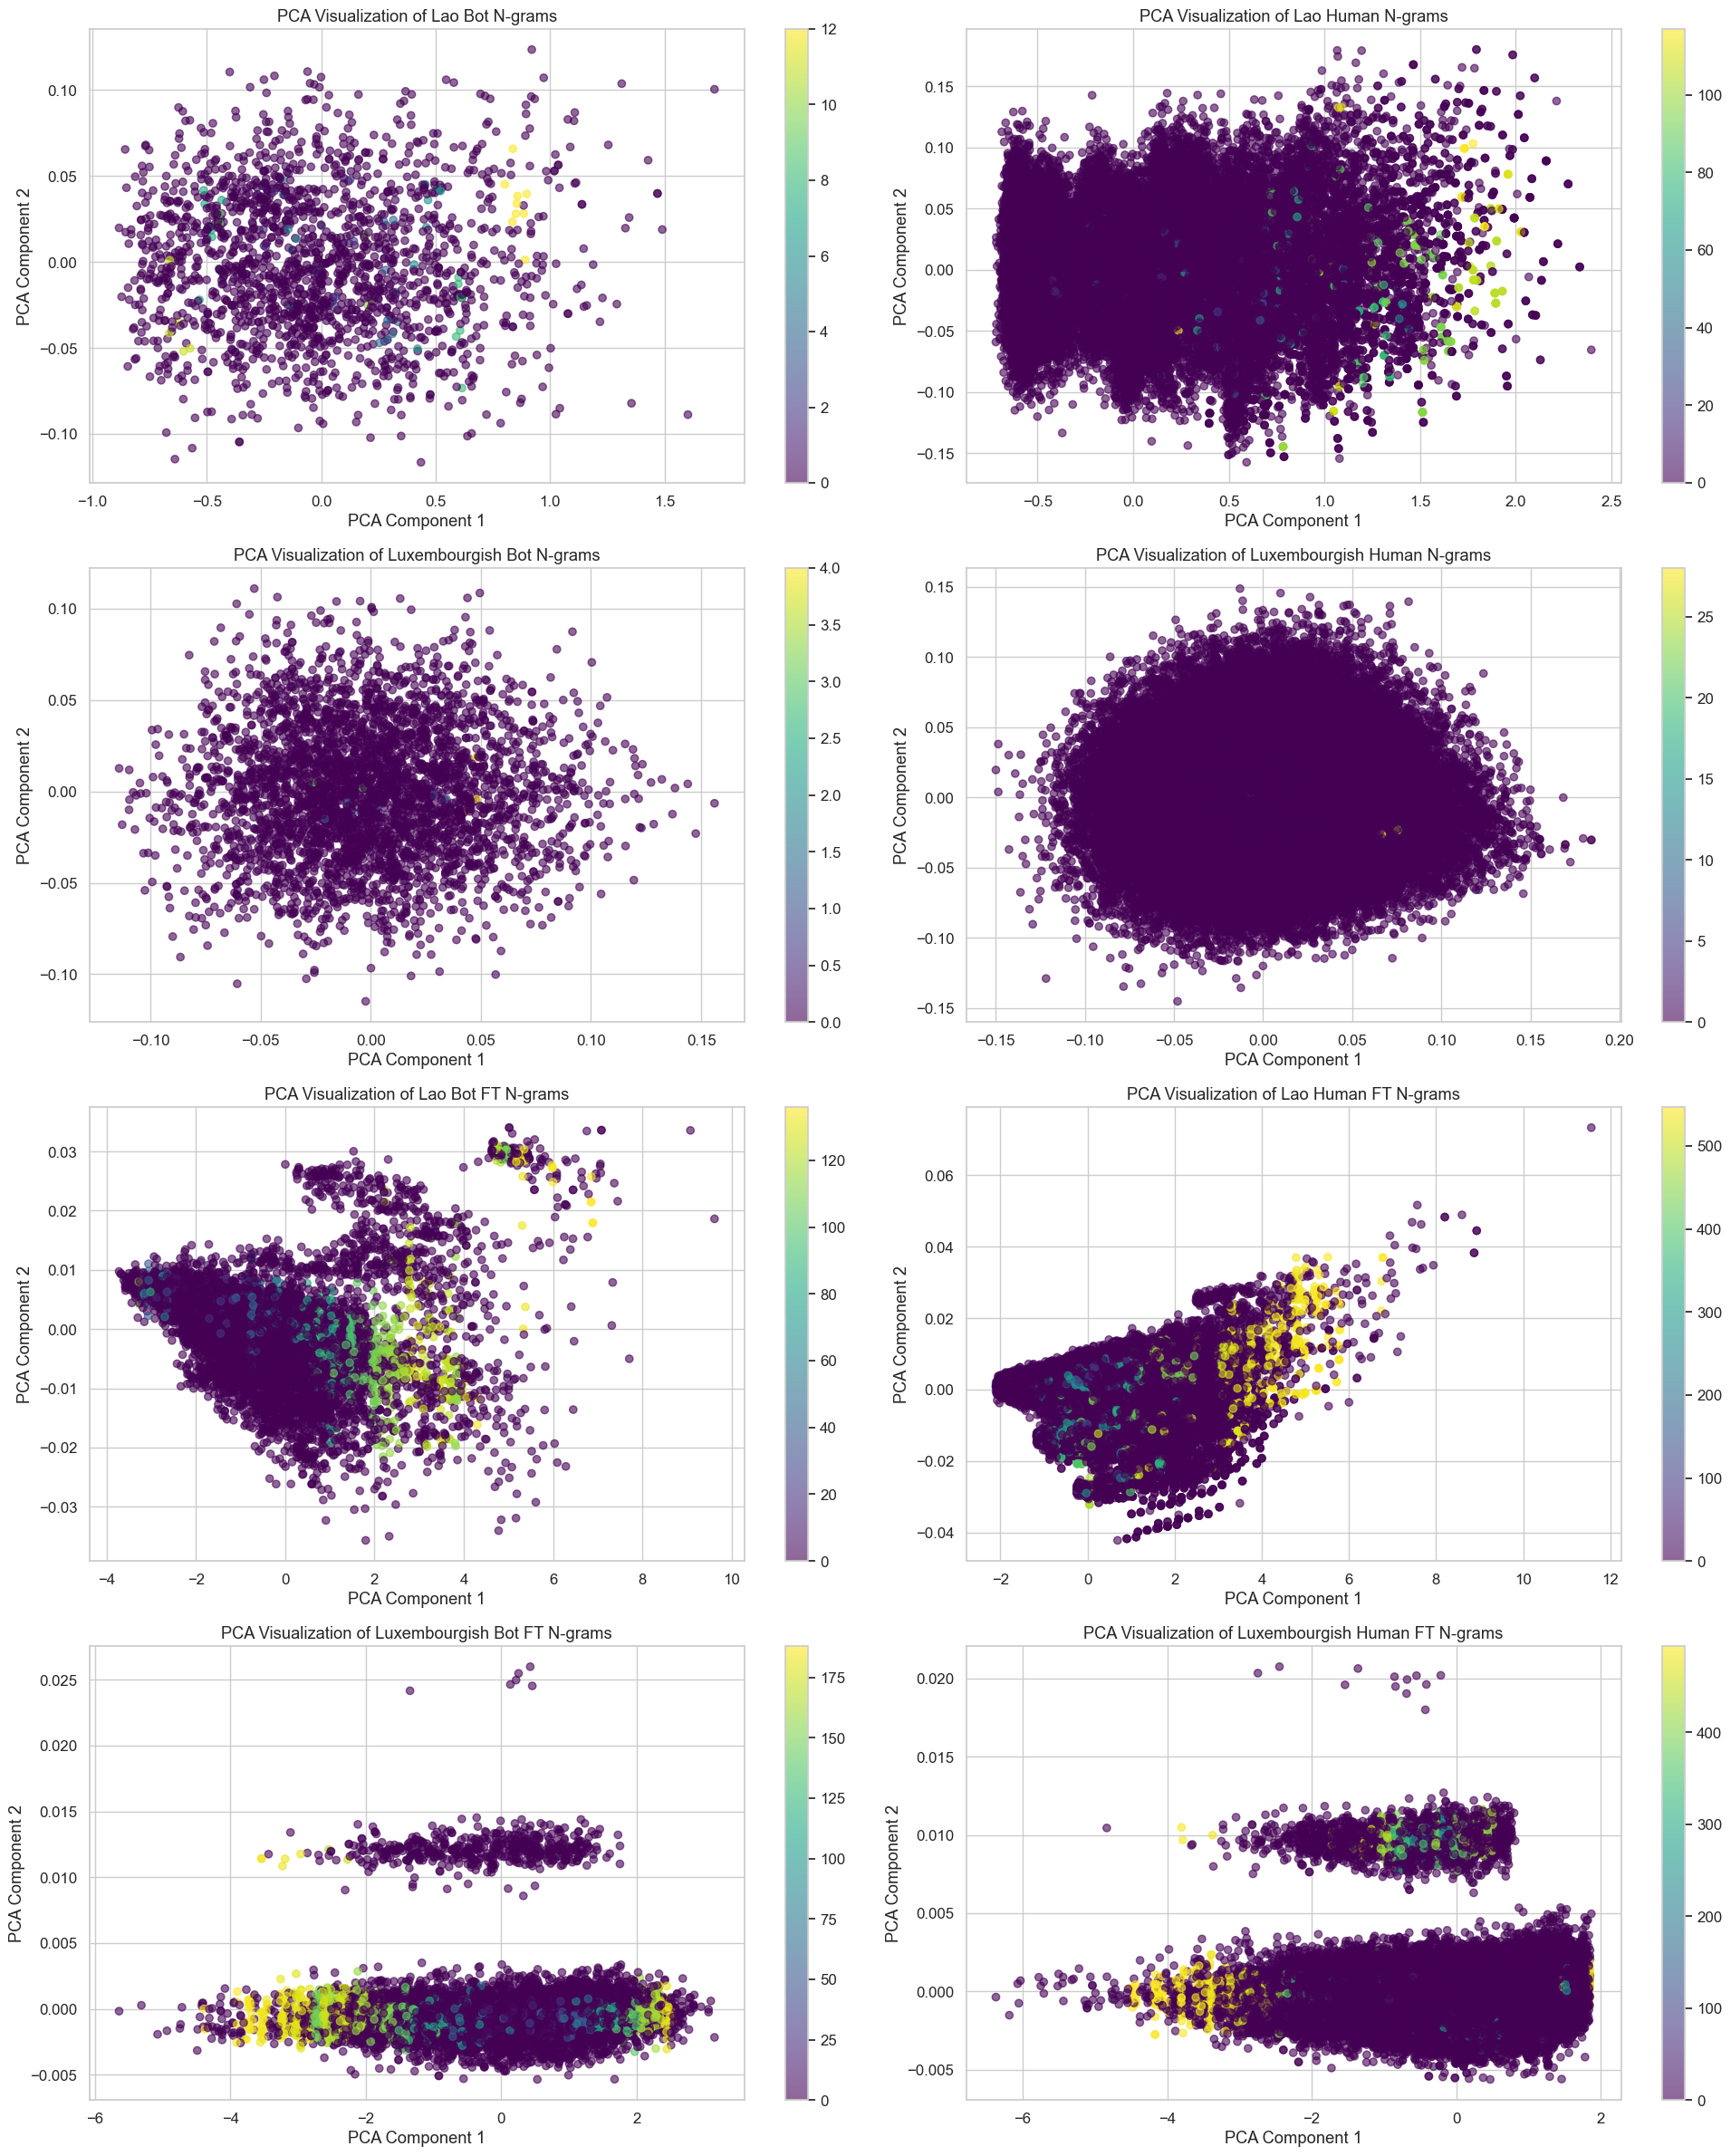

In [256]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Make sure Wishart is imported in your environment, e.g.:
# from your_wishart_module import Wishart

# Your Lao & Luxembourgish vectors
vectors_lists = [
    vectors_lao_bot,   vectors_lao_human,
    vectors_lux_bot,   vectors_lux_human,
    vectors_lao_bot_ft, vectors_lao_human_ft,
    vectors_lux_bot_ft, vectors_lux_human_ft
]

titles = [
    "Lao Bot", "Lao Human",
    "Luxembourgish Bot", "Luxembourgish Human",
    "Lao Bot FT", "Lao Human FT",
    "Luxembourgish Bot FT", "Luxembourgish Human FT"
]

plt.figure(figsize=(20, 24))

for i, (vectors, title) in enumerate(zip(vectors_lists, titles), start=1):
    # re-run Wishart clustering so labels is a real array
    labels = Wishart(wishart_neighbors=15, significance_level=0.05).fit(vectors)
    
    # PCA down to 2D
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)
    
    # Plot
    plt.subplot(4, 2, i)
    sc = plt.scatter(
        reduced[:, 0],
        reduced[:, 1],
        c=labels,
        cmap='viridis',
        alpha=0.6
    )
    plt.colorbar(sc)
    plt.title(f'PCA Visualization of {title} N-grams')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()
